In [1]:
from kan import KAN
from sklearn.model_selection import KFold,cross_val_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import torch
import process as data
import numpy as np
import scipy.stats.stats as st
import csv
import pandas as pd

ac_p,label=data.deal()
aac=data.fe()
ctd=data.CTD()
gaac=data.gaac()


39


In [2]:
protein_list = []
with open('sequence.txt', 'r') as file:
        for line in file:
            line = line.strip()
            if not line.startswith(">"):  # 忽略ID行，只保存序列行
                protein_list.append(line)


In [3]:
def maccs_feature(protein_list):
    maccs_list=[]
    with open('maccs_fp.txt','r') as f:
        for line in f:
            maccs=list(map(int,line.strip().split()))
            print(maccs)
            maccs_list.append(maccs)
    return maccs_list
maccs_list=maccs_feature(protein_list)
           
# len(maccs_list),len(maccs_list[0])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [4]:
def calculate_GAAC(protein_list):
    # 定义氨基酸分组
    groups = {
        'G1': 'GAVLMI',  # 脂肪族
        'G2': 'FYW',     # 芳香族
        'G3': 'KRH',     # 带正电
        'G4': 'DE',      # 带负电
        'G5': 'STCPNQ'   # 不带电
    }

    # 初始化结果列表
    results = []

    # 遍历蛋白质序列
    for protein in protein_list:
        # 计算每个组的频率
        group_counts = {key: 0 for key in groups}
        total_length = len(protein)

        for aa in protein:
            for group_name, group_aa in groups.items():
                if aa in group_aa:
                    group_counts[group_name] += 1
                    break

        # 计算频率
        group_frequencies = [count / total_length for count in group_counts.values()]
        results.append(group_frequencies)

    return results

# 示例蛋白质序列列表

gaac = calculate_GAAC(protein_list)


In [5]:
def calculate_aac(protein_list):
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY'

    # 初始化存储结果的列表
    aac_list = []

    for protein_sequence in protein_list:
        # 初始化AAC特征字典
        aac = {aa: 0 for aa in amino_acids}

        # 计算每种氨基酸在序列中的频率
        for aa in protein_sequence:
            if aa in aac:
                aac[aa] += 1

        # 将频率转换为比例
        sequence_length = len(protein_sequence)
        aac = [count / sequence_length for aa, count in aac.items()]

        # 将结果添加到列表中
        aac_list.append(aac)

    return aac_list
aac = calculate_aac(protein_list)

In [6]:
def aaindex():
    protein_list = []
    csv_file_path = 'aaindex1.csv'
    lag=2
    data = []
    with open(csv_file_path, mode='r', encoding='utf-8') as file:
        csv_reader = csv.reader(file)
        
        # Skip the first cell of the first row
        for row in csv_reader:
            # Append the row with the first cell removed to the data list
            # data.append([float(value) for value in row[1:]])
            data.append(row[1:])
    data=data[1:]
    AAindex_list = [
        [float(value) if value not in ['NA', ''] else None for value in row]
        for row in data
    ]
    # NAKH900113 【200】，KRIW710101【146】， HUTJ700103【117】，ZIMJ680103【399】，TANS770104【368】，CEDJ970105【459】，QIAN880127【283】，LEVM760107【158】
    # selected_indices = [200, 146, 117, 399, 368,459,283, 158]
    # AAindex_list = [AAindex_list[i] for i in selected_indices if i < len(AAindex_list)]
    with open('sequence.txt', 'r') as file:
        for line in file:
            line = line.strip()
            if not line.startswith(">"):  # 忽略ID行，只保存序列行
                protein_list.append(line)
                
    autocorrelation = []
    for sequence in protein_list:
        temp=[]
        for property_values in AAindex_list:
        # 将氨基酸序列转换为属性值序列
        #     property_values = np.array([property_dict[aa] for aa in sequence])
            property_values = [0 if value is None else value for value in property_values]
            # 计算属性值的平均值
            # print(property_values)
            mean_value = np.mean(property_values)
            # print(mean_value)
            # 计算Moran自相关
            n = len(sequence)
            autocorr = np.sum((property_values[:-lag] - mean_value) * (property_values[lag:] - mean_value))
            autocorr /= (n - lag)
            temp.append(autocorr)

        autocorrelation.append(temp)
        
    v = []
    for i in range(len(autocorrelation)):
        vtar = autocorrelation[i]
        vtarv = []
        vtar7 = 0
        vtar8 = 0
        vtar9 = 0
        s = pd.Series(vtar)
        vtar3 = np.mean(vtar)  # These 4 dimensions are relevant statistical terms
        vtar4 = st.kurtosis(vtar)
        vtar5 = np.var(vtar)
        vtar6 = st.skew(vtar)
        #for p in range(len(vtar)): # These 3 dimensions are inspired by PAFIG algorithm
        #vtar7=vtar[p]**2+vtar7
        #if vtar[p]>va:
        #vtar8=vtar[p]**2+vtar8
        #else:
        #vtar9=vtar[p]**2+vtar9
        vcf1 = []
        vcf2 = []
        for j in range(len(vtar) - 1):  #Sequence-order-correlation terms
            vcf1.append((vtar[j] - vtar[j + 1]))
        for k in range(len(vtar) - 2):
            vcf2.append((vtar[k] - vtar[k + 2]))
        vtar10 = np.mean(vcf1)
        vtar11 = np.var(vcf1)
        vtar11A = st.kurtosis(vcf1)
        vtar11B = st.skew(vcf1)
        vtar12 = np.mean(vcf2)
        vtar13 = np.var(vcf2)
        vtar13A = st.kurtosis(vcf2)
        vtar13B = st.skew(vcf2)
        vtarv.append(vtar3)
        vtarv.append(vtar4)
        vtarv.append(vtar5)
        vtarv.append(vtar6)
        #vtarv.append(vtar7/len(vtar))
        #vtarv.append(vtar8/len(vtar))
        #vtarv.append(vtar9/len(vtar))
        vtarv.append(vtar10)
        vtarv.append(vtar11)
        vtarv.append(vtar11A)
        vtarv.append(vtar11B)
        vtarv.append(vtar12)
        vtarv.append(vtar13)
        vtarv.append(vtar13A)
        vtarv.append(vtar13B)
        v.append(vtarv)
    return v



In [7]:
v=aaindex()
v = np.array(v)  # 转换为 NumPy 数组
# print(v.shape,type(v))
# 检查是否为二维数组
if len(v.shape) == 2:
    # 对每一行进行 Z-score 标准化
    v = (v - np.mean(v, axis=1, keepdims=True)) / np.std(v, axis=1, keepdims=True)
    print(v[0])
else:
    print("v 不是二维数组")

[-0.55786107 -0.55561036  0.93206    -0.55761631 -0.55751747  1.97661393
 -0.55618619 -0.557518   -0.55751747  2.105045   -0.55637066 -0.55752139]


In [8]:
X=np.concatenate((aac,v),axis=1)
X=np.concatenate((aac,v,maccs_list),axis=1)
print(X.shape)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# model = KAN(width=[37,3,1], grid=3, k=3)
fold = 1

y=label
y=np.array(y)
X = X.astype(np.float32)
y = y.astype(np.float32)
X.shape,y.shape,X[0],y[0]

(740, 199)


((740, 199),
 (740,),
 array([ 0.20689656,  0.03448276,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.06896552,  0.20689656,
         0.        ,  0.        ,  0.13793103,  0.06896552,  0.20689656,
         0.        ,  0.        ,  0.06896552,  0.        ,  0.        ,
        -0.5578611 , -0.55561036,  0.93206   , -0.5576163 , -0.55751747,
         1.9766139 , -0.5561862 , -0.557518  , -0.55751747,  2.105045  ,
        -0.5563707 , -0.5575214 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.     

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train).view(-1, 1)
X_test = torch.tensor(X_test)
y_test = torch.tensor(y_test).view(-1, 1)
X_train = torch.tensor(X_train ,dtype=torch.float32)
y_train = torch.tensor(y_train,dtype=torch.float32)
X_test = torch.tensor(X_test,dtype=torch.float32)
y_test = torch.tensor(y_test,dtype=torch.float32)
print(X_train.shape,y_train.shape,X_train[0],y_test[0])

dataset = {}
dataset = {
    'train_input': X_train,
    'test_input': X_test,
    'train_label': y_train,
    'test_label': y_test
}
# X_train

torch.Size([555, 199]) torch.Size([555, 1]) tensor([ 0.1000,  0.0000,  0.0000,  0.0000,  0.0000,  0.1000,  0.0000,  0.1000,
         0.2000,  0.4000,  0.0000,  0.0500,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0500, -0.5575, -0.5564,  0.9322, -0.5573,
        -0.5573,  1.9766, -0.5567, -0.5573, -0.5573,  2.1050, -0.5568, -0.5573,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  1.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.00

/home/wangli/anaconda3/envs/mykan/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # This is added back by InteractiveShellApp.init_path()
/home/wangli/anaconda3/envs/mykan/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == "":
/home/wangli/anaconda3/envs/mykan/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]
/home/wangli/anaconda3/envs/mykan/lib/python3.7/

In [17]:
# 5,7,9  (train>test)
# 5 7 7 （test>train)
# 7，7，7（test>train)
model = KAN(width=[199,7,1], grid=9, k=9, seed=42) 
#初始化完模型就可以可视化原数据
# model(dataset['train_input'])
# model.plot(beta=100)
from sklearn.metrics import roc_auc_score, confusion_matrix, matthews_corrcoef
def train_acc():
    pred=model(X_train)
    with torch.no_grad():
        pred_labels = (pred > 0.5).float() 
        auc = roc_auc_score(y_train.cpu(), pred.cpu())

    # 混淆矩阵计算
        tn, fp, fn, tp = confusion_matrix(y_train.cpu(), pred_labels.cpu()).ravel()

        # Specificity (SP)
        sp = tn / (tn + fp) if (tn + fp) > 0 else 0
        
        acc = (tp + tn) / (tp + tn + fp + fn)

        # Sensitivity (SN)
        sn = tp / (tp + fn) if (tp + fn) > 0 else 0

        # Matthews Correlation Coefficient (MCC)
        mcc = matthews_corrcoef(y_train.cpu(), pred_labels.cpu())
    print(f"ACC: {acc:.4f}, AUC: {auc:.4f}, SP: {sp:.4f}, MCC: {mcc:.4f}, SN: {sn:.4f}")
    return torch.mean((torch.round(model(X_train)[:, 0]) == y_train[:, 0]).float())

def test_acc():
    pred=model(X_test)
    with torch.no_grad():
        pred_labels = (pred > 0.5).float() 
        auc = roc_auc_score(y_test.cpu(), pred.cpu())

    # 混淆矩阵计算
        tn, fp, fn, tp = confusion_matrix(y_test.cpu(), pred_labels.cpu()).ravel()

        # Specificity (SP)
        sp = tn / (tn + fp) if (tn + fp) > 0 else 0
        
        acc = (tp + tn) / (tp + tn + fp + fn)

        # Sensitivity (SN)
        sn = tp / (tp + fn) if (tp + fn) > 0 else 0

        # Matthews Correlation Coefficient (MCC)
        mcc = matthews_corrcoef(y_test.cpu(), pred_labels.cpu())
    print(f"ACC: {acc:.4f}, AUC(test): {auc:.4f}, SP: {sp:.4f}, MCC: {mcc:.4f}, SN: {sn:.4f}")
    return torch.mean((torch.round(model(X_test)[:, 0]) == y_test[:, 0]).float())

# results = model.train(dataset, opt="LBFGS", steps=10, metrics=(train_acc, test_acc)) ,lamb=0.001 lamb_entropy=4.,lamb=0.1,lamb_l1=2.5,
# lamb=0.005 train/fit   epoch30
results = model.fit(dataset, opt="LBFGS", steps=3, metrics=(train_acc, test_acc));
print(results['train_acc'][-1], results['test_acc'][-1])

checkpoint directory created: ./model
saving model version 0.0


description:   0%|                                                            | 0/3 [00:06<?, ?it/s]


KeyboardInterrupt: 

In [21]:
from hyperopt import hp
space = {
    # 'width': [
    #     # hp.quniform('width1', 50, 250, 1),  # 第一层宽度，范围50到250
    #     hp.quniform('width2', 2, 100, 1),   # 第二层宽度，范围2到100
    #     hp.quniform('width3', 1, 10, 1)     # 第三层宽度，范围1到10
    # ],
    'width2': hp.quniform('width2', 2, 9, 1), 
    # grid值可以在一个合理的范围内调整，比如1到20
    'grid': hp.quniform('grid', 2, 9, 1),
    # k的取值可以在2到20之间调整
    'k': hp.quniform('k', 2, 9, 1),
    # seed通常不需要优化，但如果需要固定，也可以保持不变
    # 'seed': 42  # 固定种子
}

In [22]:
from sklearn.metrics import roc_auc_score, confusion_matrix, matthews_corrcoef
def train_acc():
    pred=model(X_train)
    with torch.no_grad():
        pred_labels = (pred > 0.5).float() 
        auc = roc_auc_score(y_train.cpu(), pred.cpu())

    # 混淆矩阵计算
        tn, fp, fn, tp = confusion_matrix(y_train.cpu(), pred_labels.cpu()).ravel()

        # Specificity (SP)
        sp = tn / (tn + fp) if (tn + fp) > 0 else 0
        
        acc = (tp + tn) / (tp + tn + fp + fn)

        # Sensitivity (SN)
        sn = tp / (tp + fn) if (tp + fn) > 0 else 0

        # Matthews Correlation Coefficient (MCC)
        mcc = matthews_corrcoef(y_train.cpu(), pred_labels.cpu())
    print(f"ACC: {acc:.4f}, AUC: {auc:.4f}, SP: {sp:.4f}, MCC: {mcc:.4f}, SN: {sn:.4f}")
    return torch.mean((torch.round(model(X_train)[:, 0]) == y_train[:, 0]).float())

def test_acc():
    pred=model(X_test)
    with torch.no_grad():
        pred_labels = (pred > 0.5).float() 
        auc = roc_auc_score(y_test.cpu(), pred.cpu())

    # 混淆矩阵计算
        tn, fp, fn, tp = confusion_matrix(y_test.cpu(), pred_labels.cpu()).ravel()

        # Specificity (SP)
        sp = tn / (tn + fp) if (tn + fp) > 0 else 0
        
        acc = (tp + tn) / (tp + tn + fp + fn)

        # Sensitivity (SN)
        sn = tp / (tp + fn) if (tp + fn) > 0 else 0

        # Matthews Correlation Coefficient (MCC)
        mcc = matthews_corrcoef(y_test.cpu(), pred_labels.cpu())
    print(f"ACC: {acc:.4f}, AUC(test): {auc:.4f}, SP: {sp:.4f}, MCC: {mcc:.4f}, SN: {sn:.4f}")
    return torch.mean((torch.round(model(X_test)[:, 0]) == y_test[:, 0]).float())

def objective(params):
    # 使用传入的超参数初始化 KAN 模型
    # model = KAN(width=[199,3,1], grid=int(params['grid']), k=int(params['k']), seed=params['seed'])
    model = KAN(
        width=[199, int(params['width2']), 1],  # 固定第一个和第三个参数，优化第二个参数
        grid=int(params['grid']),
        k=int(params['k']),
        # seed=params['seed']
    )
    print("params['width2'],",int(params['width2']))
    print("int(params['grid']),",int(params['grid']))
    print("int(params['k'])",int(params['k']))
    # loss_fn=torch.nn.CrossEntropyLoss()
    # 使用指定的优化器、训练步数和评估指标训练模型
    # results = model.fit(dataset, opt="LBFGS", steps=3, metrics=(train_acc, test_acc));
    results = model.fit(
        dataset, 
        opt="LBFGS", 
        steps=5, 
        metrics=(train_acc, test_acc), 
        # loss_fn=loss_fn
    )
    test_accuracy=results['test_acc'][-1]
    print('test_accuracy',test_accuracy)
    # 获取测试集准确率（results 中第二个指标是 test_acc）
    # test_accuracy = test_acc()

    # 返回负的测试集准确率，优化时最大化准确率
    return -test_accuracy  # 取负数使其最小化负准确率


In [23]:
from hyperopt import fmin, tpe, Trials

# 调用 fmin 函数进行优化
best = fmin(
    fn=objective,          # 目标函数
    space=space,           # 超参数搜索空间
    algo=tpe.suggest,      # TPE 算法用于搜索
    max_evals=20,         # 最大评估次数
    trials=Trials()        # 保存试验结果
)
best_params = {'C': best['C'], 'gamma': best['gamma']}
best_accuracy = -objective(best)
print("最佳参数：", best_params)
print("最佳准确率：", best_accuracy)


checkpoint directory created: ./model                 
saving model version 0.0                              
  0%|          | 0/30 [00:00<?, ?trial/s, best loss=?]

description:   0%|                                                            | 0/5 [00:00<?, ?it/s]



ACC: 0.9586, AUC: 0.9890, SP: 0.9662, MCC: 0.9172, SN: 0.9516
ACC: 0.8595, AUC(test): 0.9332, SP: 0.8365, MCC: 0.7203, SN: 0.8889
  0%|          | 0/30 [00:15<?, ?trial/s, best loss=?]

| train_loss: 2.23e-01 | test_loss: 3.28e-01 | reg: 0.00e+00 | :   0%|        | 0/5 [00:15<?, ?it/s]

| train_loss: 2.23e-01 | test_loss: 3.28e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:15<01:00, 15.23s/it



ACC: 0.9946, AUC: 1.0000, SP: 0.9962, MCC: 0.9892, SN: 0.9931
ACC: 0.8919, AUC(test): 0.9384, SP: 0.8654, MCC: 0.7857, SN: 0.9259
  0%|          | 0/30 [00:31<?, ?trial/s, best loss=?]

| train_loss: 1.31e-01 | test_loss: 3.21e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:31<01:00, 15.23s/it

| train_loss: 1.31e-01 | test_loss: 3.21e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:31<00:46, 15.63s/it



ACC: 1.0000, AUC: 1.0000, SP: 1.0000, MCC: 1.0000, SN: 1.0000
ACC: 0.8919, AUC(test): 0.9316, SP: 0.8558, MCC: 0.7880, SN: 0.9383
  0%|          | 0/30 [00:47<?, ?trial/s, best loss=?]

| train_loss: 8.26e-02 | test_loss: 3.29e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:47<00:46, 15.63s/it

| train_loss: 8.26e-02 | test_loss: 3.29e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [00:47<00:31, 15.82s/it



ACC: 1.0000, AUC: 1.0000, SP: 1.0000, MCC: 1.0000, SN: 1.0000
ACC: 0.8973, AUC(test): 0.9327, SP: 0.8654, MCC: 0.7977, SN: 0.9383
  0%|          | 0/30 [01:04<?, ?trial/s, best loss=?]

| train_loss: 4.94e-02 | test_loss: 3.33e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [01:03<00:31, 15.82s/it

| train_loss: 4.94e-02 | test_loss: 3.33e-01 | reg: 0.00e+00 | :  80%|8| 4/5 [01:03<00:16, 16.05s/it



ACC: 1.0000, AUC: 1.0000, SP: 1.0000, MCC: 1.0000, SN: 1.0000
ACC: 0.8919, AUC(test): 0.9306, SP: 0.8750, MCC: 0.7838, SN: 0.9136
  0%|          | 0/30 [01:22<?, ?trial/s, best loss=?]

| train_loss: 3.04e-02 | test_loss: 3.37e-01 | reg: 5.96e+01 | :  80%|8| 4/5 [01:22<00:16, 16.05s/it

| train_loss: 3.04e-02 | test_loss: 3.37e-01 | reg: 5.96e+01 | : 100%|#| 5/5 [01:22<00:00, 16.96s/it

| train_loss: 3.04e-02 | test_loss: 3.37e-01 | reg: 5.96e+01 | : 100%|#| 5/5 [01:22<00:00, 16.43s/it


saving model version 0.1                              
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
  3%|▎         | 1/30 [01:22<40:04, 82.92s/trial, best loss: -0.8864864706993103]

description:   0%|                                                            | 0/5 [00:00<?, ?it/s]



ACC: 0.8486, AUC: 0.9350, SP: 0.8195, MCC: 0.6969, SN: 0.8754                    
ACC: 0.8162, AUC(test): 0.9276, SP: 0.7500, MCC: 0.6478, SN: 0.9012              
  3%|▎         | 1/30 [01:37<40:04, 82.92s/trial, best loss: -0.8864864706993103]

| train_loss: 3.28e-01 | test_loss: 3.50e-01 | reg: 0.00e+00 | :   0%|        | 0/5 [00:14<?, ?it/s]

| train_loss: 3.28e-01 | test_loss: 3.50e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:14<00:58, 14.73s/it



ACC: 0.9171, AUC: 0.9795, SP: 0.9023, MCC: 0.8340, SN: 0.9308                    
ACC: 0.8865, AUC(test): 0.9649, SP: 0.8654, MCC: 0.7738, SN: 0.9136              
  3%|▎         | 1/30 [01:55<40:04, 82.92s/trial, best loss: -0.8864864706993103]

| train_loss: 2.52e-01 | test_loss: 2.84e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:32<00:58, 14.73s/it

| train_loss: 2.52e-01 | test_loss: 2.84e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:32<00:49, 16.59s/it



ACC: 0.9477, AUC: 0.9913, SP: 0.9474, MCC: 0.8953, SN: 0.9481                    
ACC: 0.9297, AUC(test): 0.9598, SP: 0.9231, MCC: 0.8583, SN: 0.9383              
  3%|▎         | 1/30 [02:13<40:04, 82.92s/trial, best loss: -0.8864864706993103]

| train_loss: 2.10e-01 | test_loss: 2.66e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:50<00:49, 16.59s/it

| train_loss: 2.10e-01 | test_loss: 2.66e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [00:50<00:34, 17.39s/it



ACC: 0.9748, AUC: 0.9964, SP: 0.9850, MCC: 0.9497, SN: 0.9654                    
ACC: 0.9243, AUC(test): 0.9615, SP: 0.9135, MCC: 0.8479, SN: 0.9383              
  3%|▎         | 1/30 [02:35<40:04, 82.92s/trial, best loss: -0.8864864706993103]

| train_loss: 1.80e-01 | test_loss: 2.74e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [01:12<00:34, 17.39s/it

| train_loss: 1.80e-01 | test_loss: 2.74e-01 | reg: 0.00e+00 | :  80%|8| 4/5 [01:12<00:19, 19.13s/it



ACC: 0.9766, AUC: 0.9991, SP: 0.9850, MCC: 0.9533, SN: 0.9689                    
ACC: 0.9297, AUC(test): 0.9503, SP: 0.9231, MCC: 0.8583, SN: 0.9383              
  3%|▎         | 1/30 [02:59<40:04, 82.92s/trial, best loss: -0.8864864706993103]

| train_loss: 1.54e-01 | test_loss: 2.95e-01 | reg: 7.89e+01 | :  80%|8| 4/5 [01:36<00:19, 19.13s/it

| train_loss: 1.54e-01 | test_loss: 2.95e-01 | reg: 7.89e+01 | : 100%|#| 5/5 [01:36<00:00, 20.94s/it

| train_loss: 1.54e-01 | test_loss: 2.95e-01 | reg: 7.89e+01 | : 100%|#| 5/5 [01:36<00:00, 19.39s/it


saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                        
  7%|▋         | 2/30 [02:59<42:34, 91.23s/trial, best loss: -0.929729700088501]

description:   0%|                                                            | 0/5 [00:00<?, ?it/s]



ACC: 0.9171, AUC: 0.9767, SP: 0.9173, MCC: 0.8340, SN: 0.9170                   
ACC: 0.8541, AUC(test): 0.9287, SP: 0.8173, MCC: 0.7130, SN: 0.9012             
  7%|▋         | 2/30 [03:14<42:34, 91.23s/trial, best loss: -0.929729700088501]

| train_loss: 2.64e-01 | test_loss: 3.38e-01 | reg: 0.00e+00 | :   0%|        | 0/5 [00:14<?, ?it/s]

| train_loss: 2.64e-01 | test_loss: 3.38e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:14<00:56, 14.07s/it



ACC: 0.9730, AUC: 0.9975, SP: 0.9737, MCC: 0.9459, SN: 0.9723                   
ACC: 0.8811, AUC(test): 0.9408, SP: 0.8846, MCC: 0.7593, SN: 0.8765             
  7%|▋         | 2/30 [03:31<42:34, 91.23s/trial, best loss: -0.929729700088501]

| train_loss: 1.79e-01 | test_loss: 3.16e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:31<00:56, 14.07s/it

| train_loss: 1.79e-01 | test_loss: 3.16e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:31<00:47, 15.82s/it



ACC: 0.9964, AUC: 1.0000, SP: 0.9962, MCC: 0.9928, SN: 0.9965                   
ACC: 0.8703, AUC(test): 0.9377, SP: 0.8750, MCC: 0.7374, SN: 0.8642             
  7%|▋         | 2/30 [03:48<42:34, 91.23s/trial, best loss: -0.929729700088501]

| train_loss: 1.23e-01 | test_loss: 3.30e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:48<00:47, 15.82s/it

| train_loss: 1.23e-01 | test_loss: 3.30e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [00:48<00:32, 16.35s/it



ACC: 1.0000, AUC: 1.0000, SP: 1.0000, MCC: 1.0000, SN: 1.0000                   
ACC: 0.8811, AUC(test): 0.9399, SP: 0.8942, MCC: 0.7584, SN: 0.8642             
  7%|▋         | 2/30 [04:04<42:34, 91.23s/trial, best loss: -0.929729700088501]

| train_loss: 9.09e-02 | test_loss: 3.38e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [01:04<00:32, 16.35s/it

| train_loss: 9.09e-02 | test_loss: 3.38e-01 | reg: 0.00e+00 | :  80%|8| 4/5 [01:04<00:16, 16.53s/it



ACC: 1.0000, AUC: 1.0000, SP: 1.0000, MCC: 1.0000, SN: 1.0000                   
ACC: 0.8973, AUC(test): 0.9345, SP: 0.9038, MCC: 0.7917, SN: 0.8889             
  7%|▋         | 2/30 [04:24<42:34, 91.23s/trial, best loss: -0.929729700088501]

| train_loss: 6.88e-02 | test_loss: 3.44e-01 | reg: 3.75e+01 | :  80%|8| 4/5 [01:24<00:16, 16.53s/it

| train_loss: 6.88e-02 | test_loss: 3.44e-01 | reg: 3.75e+01 | : 100%|#| 5/5 [01:24<00:00, 17.61s/it

| train_loss: 6.88e-02 | test_loss: 3.44e-01 | reg: 3.75e+01 | : 100%|#| 5/5 [01:24<00:00, 16.88s/it


saving model version 0.1                                                        
checkpoint directory created: ./model                                           
saving model version 0.0                                                        
 10%|█         | 3/30 [04:24<39:40, 88.16s/trial, best loss: -0.929729700088501]

description:   0%|                                                            | 0/5 [00:00<?, ?it/s]



ACC: 0.8739, AUC: 0.9608, SP: 0.8459, MCC: 0.7476, SN: 0.8997                   
ACC: 0.8000, AUC(test): 0.9348, SP: 0.7212, MCC: 0.6208, SN: 0.9012             
 10%|█         | 3/30 [04:42<39:40, 88.16s/trial, best loss: -0.929729700088501]

| train_loss: 2.95e-01 | test_loss: 3.46e-01 | reg: 0.00e+00 | :   0%|        | 0/5 [00:17<?, ?it/s]

| train_loss: 2.95e-01 | test_loss: 3.46e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:17<01:11, 17.83s/it



ACC: 0.9369, AUC: 0.9900, SP: 0.9361, MCC: 0.8737, SN: 0.9377                   
ACC: 0.8973, AUC(test): 0.9519, SP: 0.8942, MCC: 0.7926, SN: 0.9012             
 10%|█         | 3/30 [04:59<39:40, 88.16s/trial, best loss: -0.929729700088501]

| train_loss: 2.19e-01 | test_loss: 2.85e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:35<01:11, 17.83s/it

| train_loss: 2.19e-01 | test_loss: 2.85e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:35<00:52, 17.55s/it



ACC: 0.9640, AUC: 0.9969, SP: 0.9699, MCC: 0.9279, SN: 0.9585                   
ACC: 0.9135, AUC(test): 0.9568, SP: 0.9135, MCC: 0.8250, SN: 0.9136             
 10%|█         | 3/30 [05:17<39:40, 88.16s/trial, best loss: -0.929729700088501]

| train_loss: 1.81e-01 | test_loss: 2.84e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:53<00:52, 17.55s/it

| train_loss: 1.81e-01 | test_loss: 2.84e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [00:53<00:35, 17.68s/it



ACC: 0.9838, AUC: 0.9991, SP: 0.9737, MCC: 0.9676, SN: 0.9931                   
ACC: 0.9135, AUC(test): 0.9608, SP: 0.8942, MCC: 0.8275, SN: 0.9383             
 10%|█         | 3/30 [05:36<39:40, 88.16s/trial, best loss: -0.929729700088501]

| train_loss: 1.50e-01 | test_loss: 2.84e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [01:11<00:35, 17.68s/it

| train_loss: 1.50e-01 | test_loss: 2.84e-01 | reg: 0.00e+00 | :  80%|8| 4/5 [01:11<00:18, 18.11s/it



ACC: 0.9946, AUC: 1.0000, SP: 0.9887, MCC: 0.9892, SN: 1.0000                   
ACC: 0.9081, AUC(test): 0.9473, SP: 0.8750, MCC: 0.8195, SN: 0.9506             
 10%|█         | 3/30 [05:56<39:40, 88.16s/trial, best loss: -0.929729700088501]

| train_loss: 1.22e-01 | test_loss: 2.98e-01 | reg: 5.82e+01 | :  80%|8| 4/5 [01:32<00:18, 18.11s/it

| train_loss: 1.22e-01 | test_loss: 2.98e-01 | reg: 5.82e+01 | : 100%|#| 5/5 [01:32<00:00, 18.89s/it

| train_loss: 1.22e-01 | test_loss: 2.98e-01 | reg: 5.82e+01 | : 100%|#| 5/5 [01:32<00:00, 18.41s/it


saving model version 0.1                                                        
checkpoint directory created: ./model                                           
saving model version 0.0                                                        
 13%|█▎        | 4/30 [05:56<38:53, 89.76s/trial, best loss: -0.929729700088501]

description:   0%|                                                            | 0/5 [00:00<?, ?it/s]



ACC: 0.8703, AUC: 0.9517, SP: 0.8647, MCC: 0.7401, SN: 0.8754                   
ACC: 0.8108, AUC(test): 0.9341, SP: 0.7500, MCC: 0.6351, SN: 0.8889             
 13%|█▎        | 4/30 [06:12<38:53, 89.76s/trial, best loss: -0.929729700088501]

| train_loss: 3.03e-01 | test_loss: 3.34e-01 | reg: 0.00e+00 | :   0%|        | 0/5 [00:15<?, ?it/s]

| train_loss: 3.03e-01 | test_loss: 3.34e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:15<01:01, 15.31s/it



ACC: 0.9369, AUC: 0.9831, SP: 0.9286, MCC: 0.8737, SN: 0.9446                   
ACC: 0.8973, AUC(test): 0.9542, SP: 0.9038, MCC: 0.7917, SN: 0.8889             
 13%|█▎        | 4/30 [06:30<38:53, 89.76s/trial, best loss: -0.929729700088501]

| train_loss: 2.30e-01 | test_loss: 2.84e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:33<01:01, 15.31s/it

| train_loss: 2.30e-01 | test_loss: 2.84e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:33<00:51, 17.29s/it



ACC: 0.9514, AUC: 0.9928, SP: 0.9511, MCC: 0.9026, SN: 0.9516                   
ACC: 0.9135, AUC(test): 0.9599, SP: 0.9135, MCC: 0.8250, SN: 0.9136             
 13%|█▎        | 4/30 [06:47<38:53, 89.76s/trial, best loss: -0.929729700088501]

| train_loss: 1.97e-01 | test_loss: 2.70e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:51<00:51, 17.29s/it

| train_loss: 1.97e-01 | test_loss: 2.70e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [00:51<00:34, 17.27s/it



ACC: 0.9712, AUC: 0.9973, SP: 0.9662, MCC: 0.9423, SN: 0.9758                   
ACC: 0.9189, AUC(test): 0.9533, SP: 0.9231, MCC: 0.8356, SN: 0.9136             
 13%|█▎        | 4/30 [07:08<38:53, 89.76s/trial, best loss: -0.929729700088501]

| train_loss: 1.65e-01 | test_loss: 2.87e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [01:12<00:34, 17.27s/it

| train_loss: 1.65e-01 | test_loss: 2.87e-01 | reg: 0.00e+00 | :  80%|8| 4/5 [01:12<00:18, 18.72s/it



ACC: 0.9802, AUC: 0.9994, SP: 0.9774, MCC: 0.9603, SN: 0.9827                   
ACC: 0.9135, AUC(test): 0.9409, SP: 0.9135, MCC: 0.8250, SN: 0.9136             
 13%|█▎        | 4/30 [07:28<38:53, 89.76s/trial, best loss: -0.929729700088501]

| train_loss: 1.41e-01 | test_loss: 3.03e-01 | reg: 6.27e+01 | :  80%|8| 4/5 [01:31<00:18, 18.72s/it

| train_loss: 1.41e-01 | test_loss: 3.03e-01 | reg: 6.27e+01 | : 100%|#| 5/5 [01:31<00:00, 18.95s/it

| train_loss: 1.41e-01 | test_loss: 3.03e-01 | reg: 6.27e+01 | : 100%|#| 5/5 [01:31<00:00, 18.30s/it


saving model version 0.1                                                        
checkpoint directory created: ./model                                           
saving model version 0.0                                                        
 17%|█▋        | 5/30 [07:28<37:41, 90.45s/trial, best loss: -0.929729700088501]

description:   0%|                                                            | 0/5 [00:00<?, ?it/s]



ACC: 0.8523, AUC: 0.9296, SP: 0.8271, MCC: 0.7040, SN: 0.8754                   
ACC: 0.7946, AUC(test): 0.9155, SP: 0.7500, MCC: 0.5974, SN: 0.8519             
 17%|█▋        | 5/30 [07:43<37:41, 90.45s/trial, best loss: -0.929729700088501]

| train_loss: 3.35e-01 | test_loss: 3.55e-01 | reg: 0.00e+00 | :   0%|        | 0/5 [00:14<?, ?it/s]

| train_loss: 3.35e-01 | test_loss: 3.55e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:14<00:59, 14.87s/it



ACC: 0.8973, AUC: 0.9708, SP: 0.8947, MCC: 0.7943, SN: 0.8997                   
ACC: 0.8757, AUC(test): 0.9557, SP: 0.8558, MCC: 0.7520, SN: 0.9012             
 17%|█▋        | 5/30 [07:59<37:41, 90.45s/trial, best loss: -0.929729700088501]

| train_loss: 2.72e-01 | test_loss: 3.02e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:31<00:59, 14.87s/it

| train_loss: 2.72e-01 | test_loss: 3.02e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:31<00:47, 15.87s/it



ACC: 0.9405, AUC: 0.9874, SP: 0.9248, MCC: 0.8810, SN: 0.9550                   
ACC: 0.9135, AUC(test): 0.9717, SP: 0.9135, MCC: 0.8250, SN: 0.9136             
 17%|█▋        | 5/30 [08:16<37:41, 90.45s/trial, best loss: -0.929729700088501]

| train_loss: 2.28e-01 | test_loss: 2.67e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:48<00:47, 15.87s/it

| train_loss: 2.28e-01 | test_loss: 2.67e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [00:48<00:32, 16.40s/it



ACC: 0.9604, AUC: 0.9929, SP: 0.9549, MCC: 0.9206, SN: 0.9654                   
ACC: 0.9081, AUC(test): 0.9738, SP: 0.9038, MCC: 0.8145, SN: 0.9136             
 17%|█▋        | 5/30 [08:33<37:41, 90.45s/trial, best loss: -0.929729700088501]

| train_loss: 1.99e-01 | test_loss: 2.68e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [01:05<00:32, 16.40s/it

| train_loss: 1.99e-01 | test_loss: 2.68e-01 | reg: 0.00e+00 | :  80%|8| 4/5 [01:05<00:16, 16.56s/it



ACC: 0.9766, AUC: 0.9975, SP: 0.9774, MCC: 0.9531, SN: 0.9758                   
ACC: 0.9027, AUC(test): 0.9662, SP: 0.8654, MCC: 0.8098, SN: 0.9506             
 17%|█▋        | 5/30 [08:53<37:41, 90.45s/trial, best loss: -0.929729700088501]

| train_loss: 1.75e-01 | test_loss: 2.87e-01 | reg: 8.46e+01 | :  80%|8| 4/5 [01:25<00:16, 16.56s/it

| train_loss: 1.75e-01 | test_loss: 2.87e-01 | reg: 8.46e+01 | : 100%|#| 5/5 [01:25<00:00, 17.75s/it

| train_loss: 1.75e-01 | test_loss: 2.87e-01 | reg: 8.46e+01 | : 100%|#| 5/5 [01:25<00:00, 17.03s/it


saving model version 0.1                                                        
checkpoint directory created: ./model                                           
saving model version 0.0                                                        
 20%|██        | 6/30 [08:53<35:28, 88.71s/trial, best loss: -0.929729700088501]

description:   0%|                                                            | 0/5 [00:00<?, ?it/s]



ACC: 0.9153, AUC: 0.9737, SP: 0.9173, MCC: 0.8305, SN: 0.9135                   
ACC: 0.8703, AUC(test): 0.9398, SP: 0.8365, MCC: 0.7444, SN: 0.9136             
 20%|██        | 6/30 [09:09<35:28, 88.71s/trial, best loss: -0.929729700088501]

| train_loss: 2.62e-01 | test_loss: 3.16e-01 | reg: 0.00e+00 | :   0%|        | 0/5 [00:15<?, ?it/s]

| train_loss: 2.62e-01 | test_loss: 3.16e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:15<01:03, 15.98s/it



ACC: 0.9694, AUC: 0.9970, SP: 0.9624, MCC: 0.9387, SN: 0.9758                   
ACC: 0.9243, AUC(test): 0.9682, SP: 0.9135, MCC: 0.8479, SN: 0.9383             
 20%|██        | 6/30 [09:29<35:28, 88.71s/trial, best loss: -0.929729700088501]

| train_loss: 1.76e-01 | test_loss: 2.57e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:35<01:03, 15.98s/it

| train_loss: 1.76e-01 | test_loss: 2.57e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:35<00:53, 17.95s/it



ACC: 0.9892, AUC: 0.9998, SP: 0.9925, MCC: 0.9784, SN: 0.9862                   
ACC: 0.9243, AUC(test): 0.9630, SP: 0.9038, MCC: 0.8493, SN: 0.9506             
 20%|██        | 6/30 [09:48<35:28, 88.71s/trial, best loss: -0.929729700088501]

| train_loss: 1.17e-01 | test_loss: 2.74e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:54<00:53, 17.95s/it

| train_loss: 1.17e-01 | test_loss: 2.74e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [00:54<00:37, 18.63s/it



ACC: 0.9964, AUC: 1.0000, SP: 0.9962, MCC: 0.9928, SN: 0.9965                   
ACC: 0.9189, AUC(test): 0.9552, SP: 0.8942, MCC: 0.8393, SN: 0.9506             
 20%|██        | 6/30 [10:07<35:28, 88.71s/trial, best loss: -0.929729700088501]

| train_loss: 9.19e-02 | test_loss: 2.87e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [01:13<00:37, 18.63s/it

| train_loss: 9.19e-02 | test_loss: 2.87e-01 | reg: 0.00e+00 | :  80%|8| 4/5 [01:13<00:18, 18.75s/it



ACC: 1.0000, AUC: 1.0000, SP: 1.0000, MCC: 1.0000, SN: 1.0000                   
ACC: 0.9189, AUC(test): 0.9541, SP: 0.9038, MCC: 0.8377, SN: 0.9383             
 20%|██        | 6/30 [10:27<35:28, 88.71s/trial, best loss: -0.929729700088501]

| train_loss: 7.51e-02 | test_loss: 2.95e-01 | reg: 3.39e+01 | :  80%|8| 4/5 [01:34<00:18, 18.75s/it

| train_loss: 7.51e-02 | test_loss: 2.95e-01 | reg: 3.39e+01 | : 100%|#| 5/5 [01:34<00:00, 19.40s/it

| train_loss: 7.51e-02 | test_loss: 2.95e-01 | reg: 3.39e+01 | : 100%|#| 5/5 [01:34<00:00, 18.85s/it


saving model version 0.1                                                        
checkpoint directory created: ./model                                           
saving model version 0.0                                                        
 23%|██▎       | 7/30 [10:28<34:42, 90.55s/trial, best loss: -0.929729700088501]

description:   0%|                                                            | 0/5 [00:00<?, ?it/s]



ACC: 0.9045, AUC: 0.9676, SP: 0.8910, MCC: 0.8087, SN: 0.9170                   
ACC: 0.8378, AUC(test): 0.9439, SP: 0.7692, MCC: 0.6915, SN: 0.9259             
 23%|██▎       | 7/30 [10:42<34:42, 90.55s/trial, best loss: -0.929729700088501]

| train_loss: 2.71e-01 | test_loss: 3.24e-01 | reg: 0.00e+00 | :   0%|        | 0/5 [00:14<?, ?it/s]

| train_loss: 2.71e-01 | test_loss: 3.24e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:14<00:59, 14.82s/it



ACC: 0.9622, AUC: 0.9945, SP: 0.9549, MCC: 0.9242, SN: 0.9689                   
ACC: 0.8757, AUC(test): 0.9638, SP: 0.8462, MCC: 0.7541, SN: 0.9136             
 23%|██▎       | 7/30 [11:01<34:42, 90.55s/trial, best loss: -0.929729700088501]

| train_loss: 1.87e-01 | test_loss: 2.83e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:32<00:59, 14.82s/it

| train_loss: 1.87e-01 | test_loss: 2.83e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:32<00:50, 16.77s/it



ACC: 0.9892, AUC: 0.9995, SP: 0.9887, MCC: 0.9783, SN: 0.9896                   
ACC: 0.8973, AUC(test): 0.9495, SP: 0.8750, MCC: 0.7957, SN: 0.9259             
 23%|██▎       | 7/30 [11:18<34:42, 90.55s/trial, best loss: -0.929729700088501]

| train_loss: 1.30e-01 | test_loss: 2.95e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:50<00:50, 16.77s/it

| train_loss: 1.30e-01 | test_loss: 2.95e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [00:50<00:34, 17.18s/it



ACC: 0.9964, AUC: 0.9998, SP: 0.9925, MCC: 0.9928, SN: 1.0000                   
ACC: 0.8865, AUC(test): 0.9435, SP: 0.8750, MCC: 0.7721, SN: 0.9012             
 23%|██▎       | 7/30 [11:41<34:42, 90.55s/trial, best loss: -0.929729700088501]

| train_loss: 9.80e-02 | test_loss: 3.15e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [01:13<00:34, 17.18s/it

| train_loss: 9.80e-02 | test_loss: 3.15e-01 | reg: 0.00e+00 | :  80%|8| 4/5 [01:13<00:19, 19.36s/it



ACC: 0.9964, AUC: 0.9999, SP: 0.9925, MCC: 0.9928, SN: 1.0000                   
ACC: 0.8811, AUC(test): 0.9360, SP: 0.8558, MCC: 0.7639, SN: 0.9136             
 23%|██▎       | 7/30 [12:03<34:42, 90.55s/trial, best loss: -0.929729700088501]

| train_loss: 8.42e-02 | test_loss: 3.16e-01 | reg: 2.92e+01 | :  80%|8| 4/5 [01:35<00:19, 19.36s/it

| train_loss: 8.42e-02 | test_loss: 3.16e-01 | reg: 2.92e+01 | : 100%|#| 5/5 [01:35<00:00, 20.26s/it

| train_loss: 8.42e-02 | test_loss: 3.16e-01 | reg: 2.92e+01 | : 100%|#| 5/5 [01:35<00:00, 19.03s/it


saving model version 0.1                                                        
checkpoint directory created: ./model                                           
saving model version 0.0                                                        
 27%|██▋       | 8/30 [12:03<33:45, 92.05s/trial, best loss: -0.929729700088501]

description:   0%|                                                            | 0/5 [00:00<?, ?it/s]



ACC: 0.9009, AUC: 0.9741, SP: 0.8872, MCC: 0.8014, SN: 0.9135                   
ACC: 0.8595, AUC(test): 0.9336, SP: 0.8269, MCC: 0.7226, SN: 0.9012             
 27%|██▋       | 8/30 [12:16<33:45, 92.05s/trial, best loss: -0.929729700088501]

| train_loss: 2.64e-01 | test_loss: 3.27e-01 | reg: 0.00e+00 | :   0%|        | 0/5 [00:13<?, ?it/s]

| train_loss: 2.64e-01 | test_loss: 3.27e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:13<00:53, 13.25s/it



ACC: 0.9856, AUC: 0.9993, SP: 0.9925, MCC: 0.9712, SN: 0.9792                   
ACC: 0.8865, AUC(test): 0.9479, SP: 0.8942, MCC: 0.7698, SN: 0.8765             
 27%|██▋       | 8/30 [12:32<33:45, 92.05s/trial, best loss: -0.929729700088501]

| train_loss: 1.61e-01 | test_loss: 3.01e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:28<00:53, 13.25s/it

| train_loss: 1.61e-01 | test_loss: 3.01e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:28<00:43, 14.52s/it



ACC: 0.9982, AUC: 1.0000, SP: 0.9962, MCC: 0.9964, SN: 1.0000                   
ACC: 0.8757, AUC(test): 0.9319, SP: 0.8750, MCC: 0.7489, SN: 0.8765             
 27%|██▋       | 8/30 [12:46<33:45, 92.05s/trial, best loss: -0.929729700088501]

| train_loss: 1.04e-01 | test_loss: 3.32e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:43<00:43, 14.52s/it

| train_loss: 1.04e-01 | test_loss: 3.32e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [00:43<00:29, 14.63s/it



ACC: 1.0000, AUC: 1.0000, SP: 1.0000, MCC: 1.0000, SN: 1.0000                   
ACC: 0.8865, AUC(test): 0.9345, SP: 0.8846, MCC: 0.7708, SN: 0.8889             
 27%|██▋       | 8/30 [13:03<33:45, 92.05s/trial, best loss: -0.929729700088501]

| train_loss: 6.79e-02 | test_loss: 3.34e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [01:00<00:29, 14.63s/it

| train_loss: 6.79e-02 | test_loss: 3.34e-01 | reg: 0.00e+00 | :  80%|8| 4/5 [01:00<00:15, 15.52s/it



ACC: 1.0000, AUC: 1.0000, SP: 1.0000, MCC: 1.0000, SN: 1.0000                   
ACC: 0.8811, AUC(test): 0.9348, SP: 0.8846, MCC: 0.7593, SN: 0.8765             
 27%|██▋       | 8/30 [13:21<33:45, 92.05s/trial, best loss: -0.929729700088501]

| train_loss: 4.84e-02 | test_loss: 3.35e-01 | reg: 6.89e+01 | :  80%|8| 4/5 [01:17<00:15, 15.52s/it

| train_loss: 4.84e-02 | test_loss: 3.35e-01 | reg: 6.89e+01 | : 100%|#| 5/5 [01:17<00:00, 16.21s/it

| train_loss: 4.84e-02 | test_loss: 3.35e-01 | reg: 6.89e+01 | : 100%|#| 5/5 [01:17<00:00, 15.55s/it


saving model version 0.1                                                        
checkpoint directory created: ./model                                           
saving model version 0.0                                                        
 30%|███       | 9/30 [13:21<30:40, 87.65s/trial, best loss: -0.929729700088501]

description:   0%|                                                            | 0/5 [00:00<?, ?it/s]



ACC: 0.9135, AUC: 0.9758, SP: 0.9248, MCC: 0.8273, SN: 0.9031                   
ACC: 0.8541, AUC(test): 0.9404, SP: 0.8654, MCC: 0.7040, SN: 0.8395             
 30%|███       | 9/30 [13:35<30:40, 87.65s/trial, best loss: -0.929729700088501]

| train_loss: 2.65e-01 | test_loss: 3.19e-01 | reg: 0.00e+00 | :   0%|        | 0/5 [00:14<?, ?it/s]

| train_loss: 2.65e-01 | test_loss: 3.19e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:14<00:56, 14.13s/it



ACC: 0.9856, AUC: 0.9996, SP: 0.9774, MCC: 0.9712, SN: 0.9931                   
ACC: 0.8811, AUC(test): 0.9539, SP: 0.8558, MCC: 0.7639, SN: 0.9136             
 30%|███       | 9/30 [13:52<30:40, 87.65s/trial, best loss: -0.929729700088501]

| train_loss: 1.61e-01 | test_loss: 3.09e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:31<00:56, 14.13s/it

| train_loss: 1.61e-01 | test_loss: 3.09e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:31<00:47, 15.97s/it



ACC: 1.0000, AUC: 1.0000, SP: 1.0000, MCC: 1.0000, SN: 1.0000                   
ACC: 0.8703, AUC(test): 0.9480, SP: 0.8462, MCC: 0.7421, SN: 0.9012             
 30%|███       | 9/30 [14:09<30:40, 87.65s/trial, best loss: -0.929729700088501]

| train_loss: 1.11e-01 | test_loss: 3.21e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:48<00:47, 15.97s/it

| train_loss: 1.11e-01 | test_loss: 3.21e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [00:48<00:32, 16.31s/it



ACC: 1.0000, AUC: 1.0000, SP: 1.0000, MCC: 1.0000, SN: 1.0000                   
ACC: 0.8757, AUC(test): 0.9414, SP: 0.8750, MCC: 0.7489, SN: 0.8765             
 30%|███       | 9/30 [14:26<30:40, 87.65s/trial, best loss: -0.929729700088501]

| train_loss: 7.83e-02 | test_loss: 3.26e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [01:05<00:32, 16.31s/it

| train_loss: 7.83e-02 | test_loss: 3.26e-01 | reg: 0.00e+00 | :  80%|8| 4/5 [01:05<00:16, 16.58s/it



ACC: 1.0000, AUC: 1.0000, SP: 1.0000, MCC: 1.0000, SN: 1.0000                   
ACC: 0.8649, AUC(test): 0.9370, SP: 0.8558, MCC: 0.7284, SN: 0.8765             
 30%|███       | 9/30 [14:45<30:40, 87.65s/trial, best loss: -0.929729700088501]

| train_loss: 5.86e-02 | test_loss: 3.31e-01 | reg: 4.50e+01 | :  80%|8| 4/5 [01:23<00:16, 16.58s/it

| train_loss: 5.86e-02 | test_loss: 3.31e-01 | reg: 4.50e+01 | : 100%|#| 5/5 [01:23<00:00, 17.41s/it

| train_loss: 5.86e-02 | test_loss: 3.31e-01 | reg: 4.50e+01 | : 100%|#| 5/5 [01:23<00:00, 16.80s/it


saving model version 0.1                                                        
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 33%|███▎      | 10/30 [14:45<28:51, 86.60s/trial, best loss: -0.929729700088501]

description:   0%|                                                            | 0/5 [00:00<?, ?it/s]



ACC: 0.9063, AUC: 0.9737, SP: 0.9023, MCC: 0.8123, SN: 0.9100                    
ACC: 0.8703, AUC(test): 0.9514, SP: 0.8462, MCC: 0.7421, SN: 0.9012              
 33%|███▎      | 10/30 [15:00<28:51, 86.60s/trial, best loss: -0.929729700088501]

| train_loss: 2.71e-01 | test_loss: 3.09e-01 | reg: 0.00e+00 | :   0%|        | 0/5 [00:14<?, ?it/s]

| train_loss: 2.71e-01 | test_loss: 3.09e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:14<00:59, 14.78s/it



ACC: 0.9838, AUC: 0.9971, SP: 0.9850, MCC: 0.9675, SN: 0.9827                    
ACC: 0.9351, AUC(test): 0.9580, SP: 0.9615, MCC: 0.8684, SN: 0.9012              
 33%|███▎      | 10/30 [15:16<28:51, 86.60s/trial, best loss: -0.929729700088501]

| train_loss: 1.83e-01 | test_loss: 2.76e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:31<00:59, 14.78s/it

| train_loss: 1.83e-01 | test_loss: 2.76e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:31<00:47, 15.72s/it



ACC: 0.9910, AUC: 0.9999, SP: 0.9962, MCC: 0.9820, SN: 0.9862                    
ACC: 0.9243, AUC(test): 0.9523, SP: 0.9519, MCC: 0.8463, SN: 0.8889              
 33%|███▎      | 10/30 [15:33<28:51, 86.60s/trial, best loss: -0.929729700088501]

| train_loss: 1.35e-01 | test_loss: 2.89e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:48<00:47, 15.72s/it

| train_loss: 1.35e-01 | test_loss: 2.89e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [00:48<00:32, 16.25s/it



ACC: 1.0000, AUC: 1.0000, SP: 1.0000, MCC: 1.0000, SN: 1.0000                    
ACC: 0.9189, AUC(test): 0.9454, SP: 0.9615, MCC: 0.8362, SN: 0.8642              
 33%|███▎      | 10/30 [15:50<28:51, 86.60s/trial, best loss: -0.929729700088501]

| train_loss: 9.69e-02 | test_loss: 3.01e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [01:04<00:32, 16.25s/it

| train_loss: 9.69e-02 | test_loss: 3.01e-01 | reg: 0.00e+00 | :  80%|8| 4/5 [01:04<00:16, 16.51s/it



ACC: 1.0000, AUC: 1.0000, SP: 1.0000, MCC: 1.0000, SN: 1.0000                    
ACC: 0.9081, AUC(test): 0.9364, SP: 0.9423, MCC: 0.8133, SN: 0.8642              
 33%|███▎      | 10/30 [16:10<28:51, 86.60s/trial, best loss: -0.929729700088501]

| train_loss: 7.41e-02 | test_loss: 3.13e-01 | reg: 4.77e+01 | :  80%|8| 4/5 [01:24<00:16, 16.51s/it

| train_loss: 7.41e-02 | test_loss: 3.13e-01 | reg: 4.77e+01 | : 100%|#| 5/5 [01:24<00:00, 17.68s/it

| train_loss: 7.41e-02 | test_loss: 3.13e-01 | reg: 4.77e+01 | : 100%|#| 5/5 [01:24<00:00, 16.94s/it


saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 37%|███▋      | 11/30 [16:10<27:15, 86.06s/trial, best loss: -0.929729700088501]

description:   0%|                                                            | 0/5 [00:00<?, ?it/s]



ACC: 0.9279, AUC: 0.9837, SP: 0.9248, MCC: 0.8556, SN: 0.9308                    
ACC: 0.8432, AUC(test): 0.9392, SP: 0.7981, MCC: 0.6940, SN: 0.9012              
 37%|███▋      | 11/30 [16:24<27:15, 86.06s/trial, best loss: -0.929729700088501]

| train_loss: 2.45e-01 | test_loss: 3.23e-01 | reg: 0.00e+00 | :   0%|        | 0/5 [00:13<?, ?it/s]

| train_loss: 2.45e-01 | test_loss: 3.23e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:13<00:55, 13.76s/it



ACC: 0.9910, AUC: 0.9998, SP: 0.9925, MCC: 0.9820, SN: 0.9896                    
ACC: 0.8919, AUC(test): 0.9433, SP: 0.8942, MCC: 0.7812, SN: 0.8889              
 37%|███▋      | 11/30 [16:40<27:15, 86.06s/trial, best loss: -0.929729700088501]

| train_loss: 1.54e-01 | test_loss: 3.11e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:29<00:55, 13.76s/it

| train_loss: 1.54e-01 | test_loss: 3.11e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:29<00:45, 15.08s/it



ACC: 1.0000, AUC: 1.0000, SP: 1.0000, MCC: 1.0000, SN: 1.0000                    
ACC: 0.8973, AUC(test): 0.9396, SP: 0.9038, MCC: 0.7917, SN: 0.8889              
 37%|███▋      | 11/30 [16:56<27:15, 86.06s/trial, best loss: -0.929729700088501]

| train_loss: 9.90e-02 | test_loss: 3.18e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:45<00:45, 15.08s/it

| train_loss: 9.90e-02 | test_loss: 3.18e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [00:45<00:30, 15.43s/it



ACC: 1.0000, AUC: 1.0000, SP: 1.0000, MCC: 1.0000, SN: 1.0000                    
ACC: 0.8757, AUC(test): 0.9345, SP: 0.8942, MCC: 0.7471, SN: 0.8519              
 37%|███▋      | 11/30 [17:13<27:15, 86.06s/trial, best loss: -0.929729700088501]

| train_loss: 6.31e-02 | test_loss: 3.30e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [01:03<00:30, 15.43s/it

| train_loss: 6.31e-02 | test_loss: 3.30e-01 | reg: 0.00e+00 | :  80%|8| 4/5 [01:03<00:16, 16.36s/it



ACC: 1.0000, AUC: 1.0000, SP: 1.0000, MCC: 1.0000, SN: 1.0000                    
ACC: 0.8757, AUC(test): 0.9313, SP: 0.8942, MCC: 0.7471, SN: 0.8519              
 37%|███▋      | 11/30 [17:34<27:15, 86.06s/trial, best loss: -0.929729700088501]

| train_loss: 4.29e-02 | test_loss: 3.34e-01 | reg: 5.16e+01 | :  80%|8| 4/5 [01:23<00:16, 16.36s/it

| train_loss: 4.29e-02 | test_loss: 3.34e-01 | reg: 5.16e+01 | : 100%|#| 5/5 [01:23<00:00, 17.87s/it

| train_loss: 4.29e-02 | test_loss: 3.34e-01 | reg: 5.16e+01 | : 100%|#| 5/5 [01:23<00:00, 16.79s/it


saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 40%|████      | 12/30 [17:34<25:38, 85.47s/trial, best loss: -0.929729700088501]

description:   0%|                                                            | 0/5 [00:00<?, ?it/s]



ACC: 0.9171, AUC: 0.9765, SP: 0.8985, MCC: 0.8341, SN: 0.9343                    
ACC: 0.8649, AUC(test): 0.9232, SP: 0.8269, MCC: 0.7348, SN: 0.9136              
 40%|████      | 12/30 [17:48<25:38, 85.47s/trial, best loss: -0.929729700088501]

| train_loss: 2.60e-01 | test_loss: 3.40e-01 | reg: 0.00e+00 | :   0%|        | 0/5 [00:13<?, ?it/s]

| train_loss: 2.60e-01 | test_loss: 3.40e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:13<00:54, 13.55s/it



ACC: 0.9982, AUC: 1.0000, SP: 1.0000, MCC: 0.9964, SN: 0.9965                    
ACC: 0.8973, AUC(test): 0.9567, SP: 0.8846, MCC: 0.7940, SN: 0.9136              
 40%|████      | 12/30 [18:04<25:38, 85.47s/trial, best loss: -0.929729700088501]

| train_loss: 1.43e-01 | test_loss: 2.93e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:30<00:54, 13.55s/it

| train_loss: 1.43e-01 | test_loss: 2.93e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:30<00:46, 15.50s/it



ACC: 1.0000, AUC: 1.0000, SP: 1.0000, MCC: 1.0000, SN: 1.0000                    
ACC: 0.8973, AUC(test): 0.9500, SP: 0.8558, MCC: 0.8001, SN: 0.9506              
 40%|████      | 12/30 [18:21<25:38, 85.47s/trial, best loss: -0.929729700088501]

| train_loss: 8.44e-02 | test_loss: 3.09e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:47<00:46, 15.50s/it

| train_loss: 8.44e-02 | test_loss: 3.09e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [00:47<00:32, 16.21s/it



ACC: 1.0000, AUC: 1.0000, SP: 1.0000, MCC: 1.0000, SN: 1.0000                    
ACC: 0.8865, AUC(test): 0.9447, SP: 0.8365, MCC: 0.7812, SN: 0.9506              
 40%|████      | 12/30 [18:38<25:38, 85.47s/trial, best loss: -0.929729700088501]

| train_loss: 5.43e-02 | test_loss: 3.17e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [01:04<00:32, 16.21s/it

| train_loss: 5.43e-02 | test_loss: 3.17e-01 | reg: 0.00e+00 | :  80%|8| 4/5 [01:04<00:16, 16.50s/it



ACC: 1.0000, AUC: 1.0000, SP: 1.0000, MCC: 1.0000, SN: 1.0000                    
ACC: 0.8865, AUC(test): 0.9396, SP: 0.8365, MCC: 0.7812, SN: 0.9506              
 40%|████      | 12/30 [18:58<25:38, 85.47s/trial, best loss: -0.929729700088501]

| train_loss: 3.71e-02 | test_loss: 3.27e-01 | reg: 3.98e+01 | :  80%|8| 4/5 [01:23<00:16, 16.50s/it

| train_loss: 3.71e-02 | test_loss: 3.27e-01 | reg: 3.98e+01 | : 100%|#| 5/5 [01:23<00:00, 17.48s/it

| train_loss: 3.71e-02 | test_loss: 3.27e-01 | reg: 3.98e+01 | : 100%|#| 5/5 [01:23<00:00, 16.73s/it


saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 43%|████▎     | 13/30 [18:58<24:04, 84.95s/trial, best loss: -0.929729700088501]

description:   0%|                                                            | 0/5 [00:00<?, ?it/s]



ACC: 0.9459, AUC: 0.9805, SP: 0.9549, MCC: 0.8920, SN: 0.9377                    
ACC: 0.8973, AUC(test): 0.9505, SP: 0.8942, MCC: 0.7926, SN: 0.9012              
 43%|████▎     | 13/30 [19:00<24:04, 84.95s/trial, best loss: -0.929729700088501]

| train_loss: 2.08e-01 | test_loss: 2.77e-01 | reg: 0.00e+00 | :   0%|        | 0/5 [00:02<?, ?it/s]

| train_loss: 2.08e-01 | test_loss: 2.77e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:02<00:09,  2.50s/it



ACC: 0.9892, AUC: 0.9941, SP: 0.9925, MCC: 0.9784, SN: 0.9862                    
ACC: 0.9081, AUC(test): 0.9366, SP: 0.8942, MCC: 0.8158, SN: 0.9259              
 43%|████▎     | 13/30 [19:03<24:04, 84.95s/trial, best loss: -0.929729700088501]

| train_loss: 1.06e-01 | test_loss: 2.92e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:04<00:09,  2.50s/it

| train_loss: 1.06e-01 | test_loss: 2.92e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:04<00:07,  2.40s/it



ACC: 0.9910, AUC: 0.9987, SP: 0.9925, MCC: 0.9820, SN: 0.9896                    
ACC: 0.8757, AUC(test): 0.9563, SP: 0.8462, MCC: 0.7541, SN: 0.9136              
 43%|████▎     | 13/30 [19:05<24:04, 84.95s/trial, best loss: -0.929729700088501]

| train_loss: 9.27e-02 | test_loss: 3.03e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:07<00:07,  2.40s/it

| train_loss: 9.27e-02 | test_loss: 3.03e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [00:07<00:04,  2.31s/it



ACC: 0.9928, AUC: 0.9990, SP: 0.9962, MCC: 0.9856, SN: 0.9896                    
ACC: 0.8919, AUC(test): 0.8794, SP: 0.8942, MCC: 0.7812, SN: 0.8889              
 43%|████▎     | 13/30 [19:07<24:04, 84.95s/trial, best loss: -0.929729700088501]

| train_loss: 8.47e-02 | test_loss: 3.27e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [00:09<00:04,  2.31s/it

| train_loss: 8.47e-02 | test_loss: 3.27e-01 | reg: 0.00e+00 | :  80%|8| 4/5 [00:09<00:02,  2.35s/it



ACC: 0.9928, AUC: 0.9998, SP: 0.9962, MCC: 0.9856, SN: 0.9896                    
ACC: 0.8973, AUC(test): 0.8764, SP: 0.9038, MCC: 0.7917, SN: 0.8889              
 43%|████▎     | 13/30 [19:11<24:04, 84.95s/trial, best loss: -0.929729700088501]

| train_loss: 7.93e-02 | test_loss: 3.20e-01 | reg: 2.01e+01 | :  80%|8| 4/5 [00:13<00:02,  2.35s/it

| train_loss: 7.93e-02 | test_loss: 3.20e-01 | reg: 2.01e+01 | : 100%|#| 5/5 [00:13<00:00,  3.03s/it

| train_loss: 7.93e-02 | test_loss: 3.20e-01 | reg: 2.01e+01 | : 100%|#| 5/5 [00:13<00:00,  2.74s/it


saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 47%|████▋     | 14/30 [19:11<16:55, 63.44s/trial, best loss: -0.929729700088501]

description:   0%|                                                            | 0/5 [00:00<?, ?it/s]



ACC: 0.8865, AUC: 0.9544, SP: 0.8609, MCC: 0.7728, SN: 0.9100                    
ACC: 0.8324, AUC(test): 0.9219, SP: 0.7596, MCC: 0.6825, SN: 0.9259              
 47%|████▋     | 14/30 [19:28<16:55, 63.44s/trial, best loss: -0.929729700088501]

| train_loss: 2.92e-01 | test_loss: 3.47e-01 | reg: 0.00e+00 | :   0%|        | 0/5 [00:16<?, ?it/s]

| train_loss: 2.92e-01 | test_loss: 3.47e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:16<01:07, 16.94s/it



ACC: 0.9441, AUC: 0.9893, SP: 0.9474, MCC: 0.8882, SN: 0.9412                    
ACC: 0.9243, AUC(test): 0.9644, SP: 0.9231, MCC: 0.8469, SN: 0.9259              
 47%|████▋     | 14/30 [19:46<16:55, 63.44s/trial, best loss: -0.929729700088501]

| train_loss: 2.15e-01 | test_loss: 2.64e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:34<01:07, 16.94s/it

| train_loss: 2.15e-01 | test_loss: 2.64e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:34<00:52, 17.36s/it



ACC: 0.9640, AUC: 0.9957, SP: 0.9586, MCC: 0.9278, SN: 0.9689                    
ACC: 0.9081, AUC(test): 0.9472, SP: 0.8942, MCC: 0.8158, SN: 0.9259              
 47%|████▋     | 14/30 [20:04<16:55, 63.44s/trial, best loss: -0.929729700088501]

| train_loss: 1.78e-01 | test_loss: 2.80e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:52<00:52, 17.36s/it

| train_loss: 1.78e-01 | test_loss: 2.80e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [00:52<00:35, 17.83s/it



ACC: 0.9838, AUC: 0.9988, SP: 0.9774, MCC: 0.9676, SN: 0.9896                    
ACC: 0.9027, AUC(test): 0.9203, SP: 0.8750, MCC: 0.8075, SN: 0.9383              
 47%|████▋     | 14/30 [20:23<16:55, 63.44s/trial, best loss: -0.929729700088501]

| train_loss: 1.45e-01 | test_loss: 3.16e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [01:11<00:35, 17.83s/it

| train_loss: 1.45e-01 | test_loss: 3.16e-01 | reg: 0.00e+00 | :  80%|8| 4/5 [01:11<00:18, 18.08s/it



ACC: 0.9874, AUC: 0.9996, SP: 0.9812, MCC: 0.9748, SN: 0.9931                    
ACC: 0.8919, AUC(test): 0.9363, SP: 0.8558, MCC: 0.7880, SN: 0.9383              
 47%|████▋     | 14/30 [20:45<16:55, 63.44s/trial, best loss: -0.929729700088501]

| train_loss: 1.26e-01 | test_loss: 3.16e-01 | reg: 3.67e+01 | :  80%|8| 4/5 [01:33<00:18, 18.08s/it

| train_loss: 1.26e-01 | test_loss: 3.16e-01 | reg: 3.67e+01 | : 100%|#| 5/5 [01:33<00:00, 19.41s/it

| train_loss: 1.26e-01 | test_loss: 3.16e-01 | reg: 3.67e+01 | : 100%|#| 5/5 [01:33<00:00, 18.65s/it


saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 50%|█████     | 15/30 [20:45<18:06, 72.44s/trial, best loss: -0.929729700088501]

description:   0%|                                                            | 0/5 [00:00<?, ?it/s]



ACC: 0.8991, AUC: 0.9665, SP: 0.8872, MCC: 0.7978, SN: 0.9100                    
ACC: 0.8541, AUC(test): 0.9357, SP: 0.8077, MCC: 0.7158, SN: 0.9136              
 50%|█████     | 15/30 [20:47<18:06, 72.44s/trial, best loss: -0.929729700088501]

| train_loss: 2.76e-01 | test_loss: 3.26e-01 | reg: 0.00e+00 | :   0%|        | 0/5 [00:02<?, ?it/s]

| train_loss: 2.76e-01 | test_loss: 3.26e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:02<00:10,  2.57s/it



ACC: 0.9604, AUC: 0.9954, SP: 0.9699, MCC: 0.9209, SN: 0.9516                    
ACC: 0.8865, AUC(test): 0.9566, SP: 0.8846, MCC: 0.7708, SN: 0.8889              
 50%|█████     | 15/30 [20:50<18:06, 72.44s/trial, best loss: -0.929729700088501]

| train_loss: 1.94e-01 | test_loss: 2.85e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:05<00:10,  2.57s/it

| train_loss: 1.94e-01 | test_loss: 2.85e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:05<00:07,  2.55s/it



ACC: 0.9856, AUC: 0.9990, SP: 0.9812, MCC: 0.9711, SN: 0.9896                    
ACC: 0.8973, AUC(test): 0.9596, SP: 0.8846, MCC: 0.7940, SN: 0.9136              
 50%|█████     | 15/30 [20:52<18:06, 72.44s/trial, best loss: -0.929729700088501]

| train_loss: 1.53e-01 | test_loss: 2.84e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:07<00:07,  2.55s/it

| train_loss: 1.53e-01 | test_loss: 2.84e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [00:07<00:05,  2.55s/it



ACC: 0.9928, AUC: 0.9997, SP: 0.9887, MCC: 0.9856, SN: 0.9965                    
ACC: 0.9135, AUC(test): 0.9567, SP: 0.9038, MCC: 0.8261, SN: 0.9259              
 50%|█████     | 15/30 [20:55<18:06, 72.44s/trial, best loss: -0.929729700088501]

| train_loss: 1.24e-01 | test_loss: 2.87e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [00:09<00:05,  2.55s/it

| train_loss: 1.24e-01 | test_loss: 2.87e-01 | reg: 0.00e+00 | :  80%|8| 4/5 [00:09<00:02,  2.41s/it



ACC: 0.9964, AUC: 0.9999, SP: 0.9962, MCC: 0.9928, SN: 0.9965                    
ACC: 0.9135, AUC(test): 0.9530, SP: 0.9038, MCC: 0.8261, SN: 0.9259              
 50%|█████     | 15/30 [21:00<18:06, 72.44s/trial, best loss: -0.929729700088501]

| train_loss: 1.08e-01 | test_loss: 2.96e-01 | reg: 4.36e+01 | :  80%|8| 4/5 [00:15<00:02,  2.41s/it

| train_loss: 1.08e-01 | test_loss: 2.96e-01 | reg: 4.36e+01 | : 100%|#| 5/5 [00:15<00:00,  3.49s/it

| train_loss: 1.08e-01 | test_loss: 2.96e-01 | reg: 4.36e+01 | : 100%|#| 5/5 [00:15<00:00,  3.05s/it


saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 53%|█████▎    | 16/30 [21:00<12:53, 55.25s/trial, best loss: -0.929729700088501]

description:   0%|                                                            | 0/5 [00:00<?, ?it/s]



ACC: 0.9063, AUC: 0.9662, SP: 0.8910, MCC: 0.8123, SN: 0.9204                    
ACC: 0.8541, AUC(test): 0.9459, SP: 0.8173, MCC: 0.7130, SN: 0.9012              
 53%|█████▎    | 16/30 [21:03<12:53, 55.25s/trial, best loss: -0.929729700088501]

| train_loss: 2.64e-01 | test_loss: 3.13e-01 | reg: 0.00e+00 | :   0%|        | 0/5 [00:03<?, ?it/s]

| train_loss: 2.64e-01 | test_loss: 3.13e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:03<00:12,  3.05s/it



ACC: 0.9532, AUC: 0.9848, SP: 0.9511, MCC: 0.9061, SN: 0.9550                    
ACC: 0.9405, AUC(test): 0.9712, SP: 0.9327, MCC: 0.8802, SN: 0.9506              
 53%|█████▎    | 16/30 [21:06<12:53, 55.25s/trial, best loss: -0.929729700088501]

| train_loss: 2.04e-01 | test_loss: 2.40e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:06<00:12,  3.05s/it

| train_loss: 2.04e-01 | test_loss: 2.40e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:06<00:09,  3.06s/it



ACC: 0.9748, AUC: 0.9916, SP: 0.9774, MCC: 0.9495, SN: 0.9723                    
ACC: 0.9189, AUC(test): 0.9531, SP: 0.9135, MCC: 0.8364, SN: 0.9259              
 53%|█████▎    | 16/30 [21:09<12:53, 55.25s/trial, best loss: -0.929729700088501]

| train_loss: 1.70e-01 | test_loss: 2.67e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:09<00:09,  3.06s/it

| train_loss: 1.70e-01 | test_loss: 2.67e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [00:09<00:06,  3.06s/it



ACC: 0.9784, AUC: 0.9954, SP: 0.9812, MCC: 0.9567, SN: 0.9758                    
ACC: 0.9243, AUC(test): 0.9322, SP: 0.9038, MCC: 0.8493, SN: 0.9506              
 53%|█████▎    | 16/30 [21:12<12:53, 55.25s/trial, best loss: -0.929729700088501]

| train_loss: 1.53e-01 | test_loss: 2.86e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [00:12<00:06,  3.06s/it

| train_loss: 1.53e-01 | test_loss: 2.86e-01 | reg: 0.00e+00 | :  80%|8| 4/5 [00:12<00:03,  3.02s/it



ACC: 0.9820, AUC: 0.9980, SP: 0.9850, MCC: 0.9639, SN: 0.9792                    
ACC: 0.9135, AUC(test): 0.9330, SP: 0.9038, MCC: 0.8261, SN: 0.9259              
 53%|█████▎    | 16/30 [21:18<12:53, 55.25s/trial, best loss: -0.929729700088501]

| train_loss: 1.37e-01 | test_loss: 2.98e-01 | reg: 2.60e+01 | :  80%|8| 4/5 [00:17<00:03,  3.02s/it

| train_loss: 1.37e-01 | test_loss: 2.98e-01 | reg: 2.60e+01 | : 100%|#| 5/5 [00:17<00:00,  3.94s/it

| train_loss: 1.37e-01 | test_loss: 2.98e-01 | reg: 2.60e+01 | : 100%|#| 5/5 [00:17<00:00,  3.54s/it


saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 57%|█████▋    | 17/30 [21:18<09:31, 43.99s/trial, best loss: -0.929729700088501]

description:   0%|                                                            | 0/5 [00:00<?, ?it/s]



ACC: 0.9189, AUC: 0.9800, SP: 0.9173, MCC: 0.8376, SN: 0.9204                    
ACC: 0.8378, AUC(test): 0.9513, SP: 0.7692, MCC: 0.6915, SN: 0.9259              
 57%|█████▋    | 17/30 [21:32<09:31, 43.99s/trial, best loss: -0.929729700088501]

| train_loss: 2.57e-01 | test_loss: 3.15e-01 | reg: 0.00e+00 | :   0%|        | 0/5 [00:14<?, ?it/s]

| train_loss: 2.57e-01 | test_loss: 3.15e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:14<00:58, 14.55s/it



ACC: 0.9766, AUC: 0.9982, SP: 0.9737, MCC: 0.9531, SN: 0.9792                    
ACC: 0.9135, AUC(test): 0.9669, SP: 0.9038, MCC: 0.8261, SN: 0.9259              
 57%|█████▋    | 17/30 [21:50<09:31, 43.99s/trial, best loss: -0.929729700088501]

| train_loss: 1.74e-01 | test_loss: 2.78e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:32<00:58, 14.55s/it

| train_loss: 1.74e-01 | test_loss: 2.78e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:32<00:49, 16.50s/it



ACC: 0.9946, AUC: 0.9999, SP: 0.9962, MCC: 0.9892, SN: 0.9931                    
ACC: 0.9135, AUC(test): 0.9681, SP: 0.9038, MCC: 0.8261, SN: 0.9259              
 57%|█████▋    | 17/30 [22:07<09:31, 43.99s/trial, best loss: -0.929729700088501]

| train_loss: 1.23e-01 | test_loss: 2.80e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:49<00:49, 16.50s/it

| train_loss: 1.23e-01 | test_loss: 2.80e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [00:49<00:33, 16.54s/it



ACC: 0.9982, AUC: 1.0000, SP: 1.0000, MCC: 0.9964, SN: 0.9965                    
ACC: 0.8811, AUC(test): 0.9581, SP: 0.8462, MCC: 0.7662, SN: 0.9259              
 57%|█████▋    | 17/30 [22:24<09:31, 43.99s/trial, best loss: -0.929729700088501]

| train_loss: 9.07e-02 | test_loss: 3.03e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [01:05<00:33, 16.54s/it

| train_loss: 9.07e-02 | test_loss: 3.03e-01 | reg: 0.00e+00 | :  80%|8| 4/5 [01:05<00:16, 16.61s/it



ACC: 1.0000, AUC: 1.0000, SP: 1.0000, MCC: 1.0000, SN: 1.0000                    
ACC: 0.8865, AUC(test): 0.9551, SP: 0.8462, MCC: 0.7784, SN: 0.9383              
 57%|█████▋    | 17/30 [22:43<09:31, 43.99s/trial, best loss: -0.929729700088501]

| train_loss: 6.85e-02 | test_loss: 3.11e-01 | reg: 4.97e+01 | :  80%|8| 4/5 [01:24<00:16, 16.61s/it

| train_loss: 6.85e-02 | test_loss: 3.11e-01 | reg: 4.97e+01 | : 100%|#| 5/5 [01:24<00:00, 17.46s/it

| train_loss: 6.85e-02 | test_loss: 3.11e-01 | reg: 4.97e+01 | : 100%|#| 5/5 [01:24<00:00, 16.94s/it


saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 60%|██████    | 18/30 [22:43<11:15, 56.26s/trial, best loss: -0.929729700088501]

description:   0%|                                                            | 0/5 [00:00<?, ?it/s]



ACC: 0.8631, AUC: 0.9427, SP: 0.8609, MCC: 0.7258, SN: 0.8651                    
ACC: 0.7892, AUC(test): 0.9193, SP: 0.7404, MCC: 0.5881, SN: 0.8519              
 60%|██████    | 18/30 [23:03<11:15, 56.26s/trial, best loss: -0.929729700088501]

| train_loss: 3.12e-01 | test_loss: 3.50e-01 | reg: 0.00e+00 | :   0%|        | 0/5 [00:20<?, ?it/s]

| train_loss: 3.12e-01 | test_loss: 3.50e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:20<01:22, 20.59s/it



ACC: 0.9243, AUC: 0.9791, SP: 0.9173, MCC: 0.8484, SN: 0.9308                    
ACC: 0.8865, AUC(test): 0.9547, SP: 0.8750, MCC: 0.7721, SN: 0.9012              
 60%|██████    | 18/30 [23:24<11:15, 56.26s/trial, best loss: -0.929729700088501]

| train_loss: 2.49e-01 | test_loss: 2.91e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:41<01:22, 20.59s/it

| train_loss: 2.49e-01 | test_loss: 2.91e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:41<01:02, 20.70s/it



ACC: 0.9423, AUC: 0.9912, SP: 0.9361, MCC: 0.8845, SN: 0.9481                    
ACC: 0.9135, AUC(test): 0.9609, SP: 0.9135, MCC: 0.8250, SN: 0.9136              
 60%|██████    | 18/30 [23:42<11:15, 56.26s/trial, best loss: -0.929729700088501]

| train_loss: 2.09e-01 | test_loss: 2.72e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:58<01:02, 20.70s/it

| train_loss: 2.09e-01 | test_loss: 2.72e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [00:58<00:38, 19.24s/it



ACC: 0.9586, AUC: 0.9961, SP: 0.9511, MCC: 0.9170, SN: 0.9654                    
ACC: 0.9135, AUC(test): 0.9323, SP: 0.9135, MCC: 0.8250, SN: 0.9136              
 60%|██████    | 18/30 [24:01<11:15, 56.26s/trial, best loss: -0.929729700088501]

| train_loss: 1.86e-01 | test_loss: 2.99e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [01:18<00:38, 19.24s/it

| train_loss: 1.86e-01 | test_loss: 2.99e-01 | reg: 0.00e+00 | :  80%|8| 4/5 [01:18<00:19, 19.26s/it



ACC: 0.9712, AUC: 0.9980, SP: 0.9699, MCC: 0.9422, SN: 0.9723                    
ACC: 0.9081, AUC(test): 0.9234, SP: 0.9135, MCC: 0.8136, SN: 0.9012              
 60%|██████    | 18/30 [24:21<11:15, 56.26s/trial, best loss: -0.929729700088501]

| train_loss: 1.69e-01 | test_loss: 3.38e-01 | reg: 6.07e+01 | :  80%|8| 4/5 [01:38<00:19, 19.26s/it

| train_loss: 1.69e-01 | test_loss: 3.38e-01 | reg: 6.07e+01 | : 100%|#| 5/5 [01:38<00:00, 19.69s/it

| train_loss: 1.69e-01 | test_loss: 3.38e-01 | reg: 6.07e+01 | : 100%|#| 5/5 [01:38<00:00, 19.72s/it


saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 63%|██████▎   | 19/30 [24:22<12:39, 69.04s/trial, best loss: -0.929729700088501]

description:   0%|                                                            | 0/5 [00:00<?, ?it/s]



ACC: 0.8757, AUC: 0.9584, SP: 0.8647, MCC: 0.7509, SN: 0.8858                    
ACC: 0.8324, AUC(test): 0.9264, SP: 0.7596, MCC: 0.6825, SN: 0.9259              
 63%|██████▎   | 19/30 [24:38<12:39, 69.04s/trial, best loss: -0.929729700088501]

| train_loss: 2.92e-01 | test_loss: 3.47e-01 | reg: 0.00e+00 | :   0%|        | 0/5 [00:16<?, ?it/s]

| train_loss: 2.92e-01 | test_loss: 3.47e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:16<01:04, 16.15s/it



ACC: 0.9351, AUC: 0.9871, SP: 0.9286, MCC: 0.8700, SN: 0.9412                    
ACC: 0.9189, AUC(test): 0.9596, SP: 0.9231, MCC: 0.8356, SN: 0.9136              
 63%|██████▎   | 19/30 [24:57<12:39, 69.04s/trial, best loss: -0.929729700088501]

| train_loss: 2.19e-01 | test_loss: 2.61e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:35<01:04, 16.15s/it

| train_loss: 2.19e-01 | test_loss: 2.61e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:35<00:54, 18.19s/it



ACC: 0.9604, AUC: 0.9944, SP: 0.9624, MCC: 0.9206, SN: 0.9585                    
ACC: 0.9081, AUC(test): 0.9455, SP: 0.8942, MCC: 0.8158, SN: 0.9259              
 63%|██████▎   | 19/30 [25:19<12:39, 69.04s/trial, best loss: -0.929729700088501]

| train_loss: 1.85e-01 | test_loss: 2.88e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:57<00:54, 18.19s/it

| train_loss: 1.85e-01 | test_loss: 2.88e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [00:57<00:39, 19.62s/it



ACC: 0.9730, AUC: 0.9972, SP: 0.9737, MCC: 0.9459, SN: 0.9723                    
ACC: 0.9027, AUC(test): 0.9454, SP: 0.8942, MCC: 0.8042, SN: 0.9136              
 63%|██████▎   | 19/30 [25:37<12:39, 69.04s/trial, best loss: -0.929729700088501]

| train_loss: 1.58e-01 | test_loss: 3.00e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [01:15<00:39, 19.62s/it

| train_loss: 1.58e-01 | test_loss: 3.00e-01 | reg: 0.00e+00 | :  80%|8| 4/5 [01:15<00:19, 19.21s/it



ACC: 0.9802, AUC: 0.9990, SP: 0.9812, MCC: 0.9603, SN: 0.9792                    
ACC: 0.8919, AUC(test): 0.9384, SP: 0.8846, MCC: 0.7823, SN: 0.9012              
 63%|██████▎   | 19/30 [25:59<12:39, 69.04s/trial, best loss: -0.929729700088501]

| train_loss: 1.42e-01 | test_loss: 3.16e-01 | reg: 4.53e+01 | :  80%|8| 4/5 [01:37<00:19, 19.21s/it

| train_loss: 1.42e-01 | test_loss: 3.16e-01 | reg: 4.53e+01 | : 100%|#| 5/5 [01:37<00:00, 20.16s/it

| train_loss: 1.42e-01 | test_loss: 3.16e-01 | reg: 4.53e+01 | : 100%|#| 5/5 [01:37<00:00, 19.51s/it


saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 67%|██████▋   | 20/30 [25:59<12:56, 77.63s/trial, best loss: -0.929729700088501]

description:   0%|                                                            | 0/5 [00:00<?, ?it/s]



ACC: 0.9243, AUC: 0.9746, SP: 0.9248, MCC: 0.8485, SN: 0.9239                    
ACC: 0.9135, AUC(test): 0.9728, SP: 0.9038, MCC: 0.8261, SN: 0.9259              
 67%|██████▋   | 20/30 [26:02<12:56, 77.63s/trial, best loss: -0.929729700088501]

| train_loss: 2.71e-01 | test_loss: 3.19e-01 | reg: 0.00e+00 | :   0%|        | 0/5 [00:03<?, ?it/s]

| train_loss: 2.71e-01 | test_loss: 3.19e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:03<00:12,  3.13s/it



ACC: 0.9495, AUC: 0.9899, SP: 0.9586, MCC: 0.8992, SN: 0.9412                    
ACC: 0.9135, AUC(test): 0.9668, SP: 0.9327, MCC: 0.8240, SN: 0.8889              
 67%|██████▋   | 20/30 [26:05<12:56, 77.63s/trial, best loss: -0.929729700088501]

| train_loss: 2.06e-01 | test_loss: 2.69e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:06<00:12,  3.13s/it

| train_loss: 2.06e-01 | test_loss: 2.69e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:06<00:09,  3.04s/it



ACC: 0.9766, AUC: 0.9903, SP: 0.9812, MCC: 0.9531, SN: 0.9723                    
ACC: 0.9081, AUC(test): 0.9461, SP: 0.9135, MCC: 0.8136, SN: 0.9012              
 67%|██████▋   | 20/30 [26:08<12:56, 77.63s/trial, best loss: -0.929729700088501]

| train_loss: 1.70e-01 | test_loss: 2.76e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:09<00:09,  3.04s/it

| train_loss: 1.70e-01 | test_loss: 2.76e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [00:09<00:05,  2.98s/it



ACC: 0.9910, AUC: 0.9964, SP: 0.9925, MCC: 0.9820, SN: 0.9896                    
ACC: 0.9027, AUC(test): 0.9474, SP: 0.9038, MCC: 0.8031, SN: 0.9012              
 67%|██████▋   | 20/30 [26:11<12:56, 77.63s/trial, best loss: -0.929729700088501]

| train_loss: 1.35e-01 | test_loss: 2.78e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [00:11<00:05,  2.98s/it

| train_loss: 1.35e-01 | test_loss: 2.78e-01 | reg: 0.00e+00 | :  80%|8| 4/5 [00:11<00:02,  2.89s/it



ACC: 0.9946, AUC: 0.9972, SP: 0.9925, MCC: 0.9892, SN: 0.9965                    
ACC: 0.9081, AUC(test): 0.9498, SP: 0.9135, MCC: 0.8136, SN: 0.9012              
 67%|██████▋   | 20/30 [26:16<12:56, 77.63s/trial, best loss: -0.929729700088501]

| train_loss: 1.12e-01 | test_loss: 2.71e-01 | reg: 1.84e+01 | :  80%|8| 4/5 [00:16<00:02,  2.89s/it

| train_loss: 1.12e-01 | test_loss: 2.71e-01 | reg: 1.84e+01 | : 100%|#| 5/5 [00:16<00:00,  3.59s/it

| train_loss: 1.12e-01 | test_loss: 2.71e-01 | reg: 1.84e+01 | : 100%|#| 5/5 [00:16<00:00,  3.32s/it


saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 70%|███████   | 21/30 [26:16<08:53, 59.33s/trial, best loss: -0.929729700088501]

description:   0%|                                                            | 0/5 [00:00<?, ?it/s]



ACC: 0.9315, AUC: 0.9735, SP: 0.9098, MCC: 0.8632, SN: 0.9516                    
ACC: 0.8541, AUC(test): 0.9501, SP: 0.7981, MCC: 0.7189, SN: 0.9259              
 70%|███████   | 21/30 [26:19<08:53, 59.33s/trial, best loss: -0.929729700088501]

| train_loss: 2.49e-01 | test_loss: 3.09e-01 | reg: 0.00e+00 | :   0%|        | 0/5 [00:02<?, ?it/s]

| train_loss: 2.49e-01 | test_loss: 3.09e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:02<00:11,  2.77s/it



ACC: 0.9604, AUC: 0.9909, SP: 0.9586, MCC: 0.9206, SN: 0.9619                    
ACC: 0.9135, AUC(test): 0.9552, SP: 0.8942, MCC: 0.8275, SN: 0.9383              
 70%|███████   | 21/30 [26:22<08:53, 59.33s/trial, best loss: -0.929729700088501]

| train_loss: 1.87e-01 | test_loss: 2.66e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:06<00:11,  2.77s/it

| train_loss: 1.87e-01 | test_loss: 2.66e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:06<00:09,  3.12s/it



ACC: 0.9838, AUC: 0.9978, SP: 0.9812, MCC: 0.9675, SN: 0.9862                    
ACC: 0.8919, AUC(test): 0.9266, SP: 0.8558, MCC: 0.7880, SN: 0.9383              
 70%|███████   | 21/30 [26:25<08:53, 59.33s/trial, best loss: -0.929729700088501]

| train_loss: 1.44e-01 | test_loss: 3.04e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:09<00:09,  3.12s/it

| train_loss: 1.44e-01 | test_loss: 3.04e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [00:09<00:06,  3.20s/it



ACC: 0.9856, AUC: 0.9993, SP: 0.9850, MCC: 0.9711, SN: 0.9862                    
ACC: 0.8811, AUC(test): 0.9063, SP: 0.8558, MCC: 0.7639, SN: 0.9136              
 70%|███████   | 21/30 [26:28<08:53, 59.33s/trial, best loss: -0.929729700088501]

| train_loss: 1.22e-01 | test_loss: 3.28e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [00:12<00:06,  3.20s/it

| train_loss: 1.22e-01 | test_loss: 3.28e-01 | reg: 0.00e+00 | :  80%|8| 4/5 [00:12<00:03,  3.08s/it



ACC: 0.9892, AUC: 0.9998, SP: 0.9887, MCC: 0.9783, SN: 0.9896                    
ACC: 0.8757, AUC(test): 0.9131, SP: 0.8558, MCC: 0.7520, SN: 0.9012              
 70%|███████   | 21/30 [26:35<08:53, 59.33s/trial, best loss: -0.929729700088501]

| train_loss: 1.05e-01 | test_loss: 3.32e-01 | reg: 2.93e+01 | :  80%|8| 4/5 [00:18<00:03,  3.08s/it

| train_loss: 1.05e-01 | test_loss: 3.32e-01 | reg: 2.93e+01 | : 100%|#| 5/5 [00:18<00:00,  4.32s/it

| train_loss: 1.05e-01 | test_loss: 3.32e-01 | reg: 2.93e+01 | : 100%|#| 5/5 [00:18<00:00,  3.77s/it


saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 73%|███████▎  | 22/30 [26:35<06:17, 47.20s/trial, best loss: -0.929729700088501]

description:   0%|                                                            | 0/5 [00:00<?, ?it/s]



ACC: 0.9153, AUC: 0.9780, SP: 0.8985, MCC: 0.8304, SN: 0.9308                    
ACC: 0.8595, AUC(test): 0.9600, SP: 0.8173, MCC: 0.7252, SN: 0.9136              
 73%|███████▎  | 22/30 [26:50<06:17, 47.20s/trial, best loss: -0.929729700088501]

| train_loss: 2.51e-01 | test_loss: 2.98e-01 | reg: 0.00e+00 | :   0%|        | 0/5 [00:14<?, ?it/s]

| train_loss: 2.51e-01 | test_loss: 2.98e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:14<00:58, 14.72s/it



ACC: 0.9568, AUC: 0.9945, SP: 0.9474, MCC: 0.9134, SN: 0.9654                    
ACC: 0.9243, AUC(test): 0.9753, SP: 0.9038, MCC: 0.8493, SN: 0.9506              
 73%|███████▎  | 22/30 [27:07<06:17, 47.20s/trial, best loss: -0.929729700088501]

| train_loss: 1.85e-01 | test_loss: 2.52e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:32<00:58, 14.72s/it

| train_loss: 1.85e-01 | test_loss: 2.52e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:32<00:48, 16.31s/it



ACC: 0.9802, AUC: 0.9994, SP: 0.9774, MCC: 0.9603, SN: 0.9827                    
ACC: 0.8919, AUC(test): 0.9524, SP: 0.8558, MCC: 0.7880, SN: 0.9383              
 73%|███████▎  | 22/30 [27:25<06:17, 47.20s/trial, best loss: -0.929729700088501]

| train_loss: 1.30e-01 | test_loss: 2.91e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:49<00:48, 16.31s/it

| train_loss: 1.30e-01 | test_loss: 2.91e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [00:49<00:33, 16.93s/it



ACC: 0.9910, AUC: 0.9999, SP: 0.9850, MCC: 0.9820, SN: 0.9965                    
ACC: 0.8919, AUC(test): 0.9528, SP: 0.8462, MCC: 0.7906, SN: 0.9506              
 73%|███████▎  | 22/30 [27:43<06:17, 47.20s/trial, best loss: -0.929729700088501]

| train_loss: 1.04e-01 | test_loss: 2.88e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [01:07<00:33, 16.93s/it

| train_loss: 1.04e-01 | test_loss: 2.88e-01 | reg: 0.00e+00 | :  80%|8| 4/5 [01:07<00:17, 17.36s/it



ACC: 1.0000, AUC: 1.0000, SP: 1.0000, MCC: 1.0000, SN: 1.0000                    
ACC: 0.9081, AUC(test): 0.9347, SP: 0.8750, MCC: 0.8195, SN: 0.9506              
 73%|███████▎  | 22/30 [28:03<06:17, 47.20s/trial, best loss: -0.929729700088501]

| train_loss: 8.49e-02 | test_loss: 3.05e-01 | reg: 4.21e+01 | :  80%|8| 4/5 [01:28<00:17, 17.36s/it

| train_loss: 8.49e-02 | test_loss: 3.05e-01 | reg: 4.21e+01 | : 100%|#| 5/5 [01:28<00:00, 18.53s/it

| train_loss: 8.49e-02 | test_loss: 3.05e-01 | reg: 4.21e+01 | : 100%|#| 5/5 [01:28<00:00, 17.69s/it


saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 77%|███████▋  | 23/30 [28:03<06:57, 59.60s/trial, best loss: -0.929729700088501]

description:   0%|                                                            | 0/5 [00:00<?, ?it/s]



ACC: 0.9441, AUC: 0.9853, SP: 0.9474, MCC: 0.8882, SN: 0.9412                    
ACC: 0.8595, AUC(test): 0.9265, SP: 0.7885, MCC: 0.7352, SN: 0.9506              
 77%|███████▋  | 23/30 [28:18<06:57, 59.60s/trial, best loss: -0.929729700088501]

| train_loss: 2.39e-01 | test_loss: 3.34e-01 | reg: 0.00e+00 | :   0%|        | 0/5 [00:14<?, ?it/s]

| train_loss: 2.39e-01 | test_loss: 3.34e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:14<00:56, 14.13s/it



ACC: 0.9964, AUC: 0.9999, SP: 0.9962, MCC: 0.9928, SN: 0.9965                    
ACC: 0.8486, AUC(test): 0.9307, SP: 0.8173, MCC: 0.7008, SN: 0.8889              
 77%|███████▋  | 23/30 [28:33<06:57, 59.60s/trial, best loss: -0.929729700088501]

| train_loss: 1.35e-01 | test_loss: 3.39e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:29<00:56, 14.13s/it

| train_loss: 1.35e-01 | test_loss: 3.39e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:29<00:45, 15.05s/it



ACC: 1.0000, AUC: 1.0000, SP: 1.0000, MCC: 1.0000, SN: 1.0000                    
ACC: 0.8649, AUC(test): 0.9313, SP: 0.8462, MCC: 0.7302, SN: 0.8889              
 77%|███████▋  | 23/30 [28:49<06:57, 59.60s/trial, best loss: -0.929729700088501]

| train_loss: 8.04e-02 | test_loss: 3.45e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:45<00:45, 15.05s/it

| train_loss: 8.04e-02 | test_loss: 3.45e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [00:45<00:30, 15.28s/it



ACC: 1.0000, AUC: 1.0000, SP: 1.0000, MCC: 1.0000, SN: 1.0000                    
ACC: 0.8324, AUC(test): 0.9303, SP: 0.8365, MCC: 0.6613, SN: 0.8272              
 77%|███████▋  | 23/30 [29:05<06:57, 59.60s/trial, best loss: -0.929729700088501]

| train_loss: 4.96e-02 | test_loss: 3.47e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [01:01<00:30, 15.28s/it

| train_loss: 4.96e-02 | test_loss: 3.47e-01 | reg: 0.00e+00 | :  80%|8| 4/5 [01:01<00:15, 15.45s/it



ACC: 1.0000, AUC: 1.0000, SP: 1.0000, MCC: 1.0000, SN: 1.0000                    
ACC: 0.8324, AUC(test): 0.9269, SP: 0.8269, MCC: 0.6629, SN: 0.8395              
 77%|███████▋  | 23/30 [29:23<06:57, 59.60s/trial, best loss: -0.929729700088501]

| train_loss: 2.92e-02 | test_loss: 3.49e-01 | reg: 5.95e+01 | :  80%|8| 4/5 [01:19<00:15, 15.45s/it

| train_loss: 2.92e-02 | test_loss: 3.49e-01 | reg: 5.95e+01 | : 100%|#| 5/5 [01:19<00:00, 16.53s/it

| train_loss: 2.92e-02 | test_loss: 3.49e-01 | reg: 5.95e+01 | : 100%|#| 5/5 [01:19<00:00, 15.91s/it


saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 80%|████████  | 24/30 [29:23<06:34, 65.68s/trial, best loss: -0.929729700088501]

description:   0%|                                                            | 0/5 [00:00<?, ?it/s]



ACC: 0.9117, AUC: 0.9792, SP: 0.9211, MCC: 0.8236, SN: 0.9031                    
ACC: 0.8595, AUC(test): 0.9411, SP: 0.8365, MCC: 0.7203, SN: 0.8889              
 80%|████████  | 24/30 [29:40<06:34, 65.68s/trial, best loss: -0.929729700088501]

| train_loss: 2.55e-01 | test_loss: 3.19e-01 | reg: 0.00e+00 | :   0%|        | 0/5 [00:17<?, ?it/s]

| train_loss: 2.55e-01 | test_loss: 3.19e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:17<01:08, 17.18s/it



ACC: 0.9766, AUC: 0.9982, SP: 0.9774, MCC: 0.9531, SN: 0.9758                    
ACC: 0.9027, AUC(test): 0.9590, SP: 0.8750, MCC: 0.8075, SN: 0.9383              
 80%|████████  | 24/30 [29:58<06:34, 65.68s/trial, best loss: -0.929729700088501]

| train_loss: 1.76e-01 | test_loss: 2.87e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:34<01:08, 17.18s/it

| train_loss: 1.76e-01 | test_loss: 2.87e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:34<00:52, 17.49s/it



ACC: 0.9946, AUC: 1.0000, SP: 1.0000, MCC: 0.9892, SN: 0.9896                    
ACC: 0.9189, AUC(test): 0.9618, SP: 0.9038, MCC: 0.8377, SN: 0.9383              
 80%|████████  | 24/30 [30:15<06:34, 65.68s/trial, best loss: -0.929729700088501]

| train_loss: 1.27e-01 | test_loss: 2.81e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:52<00:52, 17.49s/it

| train_loss: 1.27e-01 | test_loss: 2.81e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [00:52<00:34, 17.42s/it



ACC: 1.0000, AUC: 1.0000, SP: 1.0000, MCC: 1.0000, SN: 1.0000                    
ACC: 0.9027, AUC(test): 0.9529, SP: 0.8750, MCC: 0.8075, SN: 0.9383              
 80%|████████  | 24/30 [30:33<06:34, 65.68s/trial, best loss: -0.929729700088501]

| train_loss: 9.24e-02 | test_loss: 3.00e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [01:10<00:34, 17.42s/it

| train_loss: 9.24e-02 | test_loss: 3.00e-01 | reg: 0.00e+00 | :  80%|8| 4/5 [01:10<00:17, 17.57s/it



ACC: 1.0000, AUC: 1.0000, SP: 1.0000, MCC: 1.0000, SN: 1.0000                    
ACC: 0.8865, AUC(test): 0.9579, SP: 0.8654, MCC: 0.7738, SN: 0.9136              
 80%|████████  | 24/30 [30:53<06:34, 65.68s/trial, best loss: -0.929729700088501]

| train_loss: 6.42e-02 | test_loss: 2.93e-01 | reg: 4.34e+01 | :  80%|8| 4/5 [01:30<00:17, 17.57s/it

| train_loss: 6.42e-02 | test_loss: 2.93e-01 | reg: 4.34e+01 | : 100%|#| 5/5 [01:30<00:00, 18.51s/it

| train_loss: 6.42e-02 | test_loss: 2.93e-01 | reg: 4.34e+01 | : 100%|#| 5/5 [01:30<00:00, 18.04s/it


saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 83%|████████▎ | 25/30 [30:54<06:05, 73.08s/trial, best loss: -0.929729700088501]

description:   0%|                                                            | 0/5 [00:00<?, ?it/s]



ACC: 0.9099, AUC: 0.9719, SP: 0.8835, MCC: 0.8200, SN: 0.9343                    
ACC: 0.8595, AUC(test): 0.9403, SP: 0.8269, MCC: 0.7226, SN: 0.9012              
 83%|████████▎ | 25/30 [30:59<06:05, 73.08s/trial, best loss: -0.929729700088501]

| train_loss: 2.53e-01 | test_loss: 3.14e-01 | reg: 0.00e+00 | :   0%|        | 0/5 [00:05<?, ?it/s]

| train_loss: 2.53e-01 | test_loss: 3.14e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:05<00:22,  5.73s/it



ACC: 0.9640, AUC: 0.9956, SP: 0.9474, MCC: 0.9281, SN: 0.9792                    
ACC: 0.9135, AUC(test): 0.9526, SP: 0.8846, MCC: 0.8293, SN: 0.9506              
 83%|████████▎ | 25/30 [31:02<06:05, 73.08s/trial, best loss: -0.929729700088501]

| train_loss: 1.70e-01 | test_loss: 2.74e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:08<00:22,  5.73s/it

| train_loss: 1.70e-01 | test_loss: 2.74e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:08<00:12,  4.05s/it



ACC: 0.9892, AUC: 0.9995, SP: 0.9850, MCC: 0.9784, SN: 0.9931                    
ACC: 0.9027, AUC(test): 0.9433, SP: 0.8750, MCC: 0.8075, SN: 0.9383              
 83%|████████▎ | 25/30 [31:05<06:05, 73.08s/trial, best loss: -0.929729700088501]

| train_loss: 1.19e-01 | test_loss: 2.88e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:11<00:12,  4.05s/it

| train_loss: 1.19e-01 | test_loss: 2.88e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [00:11<00:07,  3.58s/it



ACC: 0.9910, AUC: 0.9997, SP: 0.9887, MCC: 0.9820, SN: 0.9931                    
ACC: 0.8865, AUC(test): 0.9494, SP: 0.8750, MCC: 0.7721, SN: 0.9012              
 83%|████████▎ | 25/30 [31:08<06:05, 73.08s/trial, best loss: -0.929729700088501]

| train_loss: 1.07e-01 | test_loss: 2.93e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [00:14<00:07,  3.58s/it

| train_loss: 1.07e-01 | test_loss: 2.93e-01 | reg: 0.00e+00 | :  80%|8| 4/5 [00:14<00:03,  3.19s/it



ACC: 0.9946, AUC: 0.9998, SP: 0.9925, MCC: 0.9892, SN: 0.9965                    
ACC: 0.8973, AUC(test): 0.9458, SP: 0.8942, MCC: 0.7926, SN: 0.9012              
 83%|████████▎ | 25/30 [31:13<06:05, 73.08s/trial, best loss: -0.929729700088501]

| train_loss: 9.75e-02 | test_loss: 2.97e-01 | reg: 2.51e+01 | :  80%|8| 4/5 [00:19<00:03,  3.19s/it

| train_loss: 9.75e-02 | test_loss: 2.97e-01 | reg: 2.51e+01 | : 100%|#| 5/5 [00:19<00:00,  4.01s/it

| train_loss: 9.75e-02 | test_loss: 2.97e-01 | reg: 2.51e+01 | : 100%|#| 5/5 [00:19<00:00,  3.94s/it


saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 87%|████████▋ | 26/30 [31:13<03:48, 57.08s/trial, best loss: -0.929729700088501]

description:   0%|                                                            | 0/5 [00:00<?, ?it/s]



ACC: 0.9405, AUC: 0.9873, SP: 0.9323, MCC: 0.8809, SN: 0.9481                    
ACC: 0.8541, AUC(test): 0.9425, SP: 0.8077, MCC: 0.7158, SN: 0.9136              
 87%|████████▋ | 26/30 [31:27<03:48, 57.08s/trial, best loss: -0.929729700088501]

| train_loss: 2.34e-01 | test_loss: 3.24e-01 | reg: 0.00e+00 | :   0%|        | 0/5 [00:13<?, ?it/s]

| train_loss: 2.34e-01 | test_loss: 3.24e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:13<00:54, 13.69s/it



ACC: 0.9964, AUC: 1.0000, SP: 0.9962, MCC: 0.9928, SN: 0.9965                    
ACC: 0.8757, AUC(test): 0.9569, SP: 0.8558, MCC: 0.7520, SN: 0.9012              
 87%|████████▋ | 26/30 [31:42<03:48, 57.08s/trial, best loss: -0.929729700088501]

| train_loss: 1.47e-01 | test_loss: 3.11e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:29<00:54, 13.69s/it

| train_loss: 1.47e-01 | test_loss: 3.11e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:29<00:44, 14.68s/it



ACC: 1.0000, AUC: 1.0000, SP: 1.0000, MCC: 1.0000, SN: 1.0000                    
ACC: 0.8486, AUC(test): 0.9475, SP: 0.8269, MCC: 0.6985, SN: 0.8765              
 87%|████████▋ | 26/30 [31:58<03:48, 57.08s/trial, best loss: -0.929729700088501]

| train_loss: 9.00e-02 | test_loss: 3.19e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:45<00:44, 14.68s/it

| train_loss: 9.00e-02 | test_loss: 3.19e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [00:45<00:30, 15.28s/it



ACC: 1.0000, AUC: 1.0000, SP: 1.0000, MCC: 1.0000, SN: 1.0000                    
ACC: 0.8541, AUC(test): 0.9403, SP: 0.8269, MCC: 0.7105, SN: 0.8889              
 87%|████████▋ | 26/30 [32:16<03:48, 57.08s/trial, best loss: -0.929729700088501]

| train_loss: 5.82e-02 | test_loss: 3.30e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [01:02<00:30, 15.28s/it

| train_loss: 5.82e-02 | test_loss: 3.30e-01 | reg: 0.00e+00 | :  80%|8| 4/5 [01:02<00:16, 16.01s/it



ACC: 1.0000, AUC: 1.0000, SP: 1.0000, MCC: 1.0000, SN: 1.0000                    
ACC: 0.8378, AUC(test): 0.9344, SP: 0.8077, MCC: 0.6790, SN: 0.8765              
 87%|████████▋ | 26/30 [32:33<03:48, 57.08s/trial, best loss: -0.929729700088501]

| train_loss: 3.69e-02 | test_loss: 3.37e-01 | reg: 5.48e+01 | :  80%|8| 4/5 [01:20<00:16, 16.01s/it

| train_loss: 3.69e-02 | test_loss: 3.37e-01 | reg: 5.48e+01 | : 100%|#| 5/5 [01:20<00:00, 16.70s/it

| train_loss: 3.69e-02 | test_loss: 3.37e-01 | reg: 5.48e+01 | : 100%|#| 5/5 [01:20<00:00, 16.02s/it


saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 90%|█████████ | 27/30 [32:34<03:12, 64.04s/trial, best loss: -0.929729700088501]

description:   0%|                                                            | 0/5 [00:00<?, ?it/s]



ACC: 0.9225, AUC: 0.9716, SP: 0.9211, MCC: 0.8448, SN: 0.9239                    
ACC: 0.8378, AUC(test): 0.9433, SP: 0.7885, MCC: 0.6846, SN: 0.9012              
 90%|█████████ | 27/30 [32:48<03:12, 64.04s/trial, best loss: -0.929729700088501]

| train_loss: 2.57e-01 | test_loss: 3.21e-01 | reg: 0.00e+00 | :   0%|        | 0/5 [00:14<?, ?it/s]

| train_loss: 2.57e-01 | test_loss: 3.21e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:14<00:58, 14.52s/it



ACC: 0.9640, AUC: 0.9961, SP: 0.9511, MCC: 0.9280, SN: 0.9758                    
ACC: 0.9081, AUC(test): 0.9620, SP: 0.8846, MCC: 0.8175, SN: 0.9383              
 90%|█████████ | 27/30 [33:07<03:12, 64.04s/trial, best loss: -0.929729700088501]

| train_loss: 1.82e-01 | test_loss: 2.74e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:33<00:58, 14.52s/it

| train_loss: 1.82e-01 | test_loss: 2.74e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:33<00:51, 17.16s/it



ACC: 0.9910, AUC: 0.9995, SP: 0.9887, MCC: 0.9820, SN: 0.9931                    
ACC: 0.8919, AUC(test): 0.9498, SP: 0.8750, MCC: 0.7838, SN: 0.9136              
 90%|█████████ | 27/30 [33:25<03:12, 64.04s/trial, best loss: -0.929729700088501]

| train_loss: 1.41e-01 | test_loss: 2.95e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:51<00:51, 17.16s/it

| train_loss: 1.41e-01 | test_loss: 2.95e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [00:51<00:34, 17.31s/it



ACC: 0.9928, AUC: 0.9998, SP: 0.9925, MCC: 0.9856, SN: 0.9931                    
ACC: 0.9081, AUC(test): 0.9423, SP: 0.9038, MCC: 0.8145, SN: 0.9136              
 90%|█████████ | 27/30 [33:42<03:12, 64.04s/trial, best loss: -0.929729700088501]

| train_loss: 1.15e-01 | test_loss: 3.02e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [01:08<00:34, 17.31s/it

| train_loss: 1.15e-01 | test_loss: 3.02e-01 | reg: 0.00e+00 | :  80%|8| 4/5 [01:08<00:17, 17.30s/it



ACC: 0.9946, AUC: 1.0000, SP: 0.9925, MCC: 0.9892, SN: 0.9965                    
ACC: 0.8865, AUC(test): 0.9353, SP: 0.8846, MCC: 0.7708, SN: 0.8889              
 90%|█████████ | 27/30 [34:01<03:12, 64.04s/trial, best loss: -0.929729700088501]

| train_loss: 9.61e-02 | test_loss: 3.14e-01 | reg: 3.62e+01 | :  80%|8| 4/5 [01:27<00:17, 17.30s/it

| train_loss: 9.61e-02 | test_loss: 3.14e-01 | reg: 3.62e+01 | : 100%|#| 5/5 [01:27<00:00, 18.14s/it

| train_loss: 9.61e-02 | test_loss: 3.14e-01 | reg: 3.62e+01 | : 100%|#| 5/5 [01:27<00:00, 17.59s/it


saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 93%|█████████▎| 28/30 [34:02<02:22, 71.23s/trial, best loss: -0.929729700088501]

description:   0%|                                                            | 0/5 [00:00<?, ?it/s]



ACC: 0.9117, AUC: 0.9750, SP: 0.9173, MCC: 0.8234, SN: 0.9066                    
ACC: 0.8541, AUC(test): 0.9398, SP: 0.8269, MCC: 0.7105, SN: 0.8889              
 93%|█████████▎| 28/30 [34:15<02:22, 71.23s/trial, best loss: -0.929729700088501]

| train_loss: 2.58e-01 | test_loss: 3.23e-01 | reg: 0.00e+00 | :   0%|        | 0/5 [00:13<?, ?it/s]

| train_loss: 2.58e-01 | test_loss: 3.23e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:13<00:55, 13.83s/it



ACC: 0.9622, AUC: 0.9967, SP: 0.9586, MCC: 0.9242, SN: 0.9654                    
ACC: 0.9027, AUC(test): 0.9531, SP: 0.8942, MCC: 0.8042, SN: 0.9136              
 93%|█████████▎| 28/30 [34:32<02:22, 71.23s/trial, best loss: -0.929729700088501]

| train_loss: 1.80e-01 | test_loss: 2.85e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:29<00:55, 13.83s/it

| train_loss: 1.80e-01 | test_loss: 2.85e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:29<00:45, 15.16s/it



ACC: 0.9964, AUC: 1.0000, SP: 1.0000, MCC: 0.9928, SN: 0.9931                    
ACC: 0.9189, AUC(test): 0.9656, SP: 0.9231, MCC: 0.8356, SN: 0.9136              
 93%|█████████▎| 28/30 [34:53<02:22, 71.23s/trial, best loss: -0.929729700088501]

| train_loss: 1.20e-01 | test_loss: 2.76e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:51<00:45, 15.16s/it

| train_loss: 1.20e-01 | test_loss: 2.76e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [00:51<00:35, 17.95s/it



ACC: 1.0000, AUC: 1.0000, SP: 1.0000, MCC: 1.0000, SN: 1.0000                    
ACC: 0.9189, AUC(test): 0.9698, SP: 0.9135, MCC: 0.8364, SN: 0.9259              
 93%|█████████▎| 28/30 [35:09<02:22, 71.23s/trial, best loss: -0.929729700088501]

| train_loss: 9.11e-02 | test_loss: 2.70e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [01:07<00:35, 17.95s/it

| train_loss: 9.11e-02 | test_loss: 2.70e-01 | reg: 0.00e+00 | :  80%|8| 4/5 [01:07<00:17, 17.38s/it



ACC: 1.0000, AUC: 1.0000, SP: 1.0000, MCC: 1.0000, SN: 1.0000                    
ACC: 0.9297, AUC(test): 0.9627, SP: 0.9231, MCC: 0.8583, SN: 0.9383              
 93%|█████████▎| 28/30 [35:30<02:22, 71.23s/trial, best loss: -0.929729700088501]

| train_loss: 6.84e-02 | test_loss: 2.80e-01 | reg: 4.68e+01 | :  80%|8| 4/5 [01:28<00:17, 17.38s/it

| train_loss: 6.84e-02 | test_loss: 2.80e-01 | reg: 4.68e+01 | : 100%|#| 5/5 [01:28<00:00, 18.53s/it

| train_loss: 6.84e-02 | test_loss: 2.80e-01 | reg: 4.68e+01 | : 100%|#| 5/5 [01:28<00:00, 17.65s/it


saving model version 0.1                                                         
checkpoint directory created: ./model                                            
saving model version 0.0                                                         
 97%|█████████▋| 29/30 [35:30<01:16, 76.38s/trial, best loss: -0.929729700088501]

description:   0%|                                                            | 0/5 [00:00<?, ?it/s]



ACC: 0.9243, AUC: 0.9836, SP: 0.8985, MCC: 0.8489, SN: 0.9481                    
ACC: 0.8432, AUC(test): 0.9423, SP: 0.8173, MCC: 0.6887, SN: 0.8765              
 97%|█████████▋| 29/30 [35:47<01:16, 76.38s/trial, best loss: -0.929729700088501]

| train_loss: 2.47e-01 | test_loss: 3.33e-01 | reg: 0.00e+00 | :   0%|        | 0/5 [00:16<?, ?it/s]

| train_loss: 2.47e-01 | test_loss: 3.33e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:16<01:07, 16.97s/it



ACC: 0.9910, AUC: 0.9997, SP: 0.9925, MCC: 0.9820, SN: 0.9896                    
ACC: 0.9027, AUC(test): 0.9455, SP: 0.8846, MCC: 0.8057, SN: 0.9259              
 97%|█████████▋| 29/30 [36:02<01:16, 76.38s/trial, best loss: -0.929729700088501]

| train_loss: 1.54e-01 | test_loss: 3.07e-01 | reg: 0.00e+00 | :  20%|2| 1/5 [00:32<01:07, 16.97s/it

| train_loss: 1.54e-01 | test_loss: 3.07e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:32<00:48, 16.11s/it



ACC: 1.0000, AUC: 1.0000, SP: 1.0000, MCC: 1.0000, SN: 1.0000                    
ACC: 0.8757, AUC(test): 0.9458, SP: 0.8462, MCC: 0.7541, SN: 0.9136              
 97%|█████████▋| 29/30 [36:18<01:16, 76.38s/trial, best loss: -0.929729700088501]

| train_loss: 1.04e-01 | test_loss: 3.24e-01 | reg: 0.00e+00 | :  40%|4| 2/5 [00:47<00:48, 16.11s/it

| train_loss: 1.04e-01 | test_loss: 3.24e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [00:47<00:31, 15.78s/it



ACC: 1.0000, AUC: 1.0000, SP: 1.0000, MCC: 1.0000, SN: 1.0000                    
ACC: 0.8595, AUC(test): 0.9430, SP: 0.8269, MCC: 0.7226, SN: 0.9012              
 97%|█████████▋| 29/30 [36:33<01:16, 76.38s/trial, best loss: -0.929729700088501]

| train_loss: 6.88e-02 | test_loss: 3.29e-01 | reg: 0.00e+00 | :  60%|6| 3/5 [01:03<00:31, 15.78s/it

| train_loss: 6.88e-02 | test_loss: 3.29e-01 | reg: 0.00e+00 | :  80%|8| 4/5 [01:03<00:15, 15.62s/it



ACC: 1.0000, AUC: 1.0000, SP: 1.0000, MCC: 1.0000, SN: 1.0000                    
ACC: 0.8649, AUC(test): 0.9414, SP: 0.8269, MCC: 0.7348, SN: 0.9136              
 97%|█████████▋| 29/30 [36:51<01:16, 76.38s/trial, best loss: -0.929729700088501]

| train_loss: 4.80e-02 | test_loss: 3.33e-01 | reg: 6.74e+01 | :  80%|8| 4/5 [01:21<00:15, 15.62s/it

| train_loss: 4.80e-02 | test_loss: 3.33e-01 | reg: 6.74e+01 | : 100%|#| 5/5 [01:21<00:00, 16.52s/it

| train_loss: 4.80e-02 | test_loss: 3.33e-01 | reg: 6.74e+01 | : 100%|#| 5/5 [01:21<00:00, 16.27s/it


saving model version 0.1                                                         
100%|██████████| 30/30 [36:52<00:00, 73.73s/trial, best loss: -0.929729700088501]


KeyError: 'C'

In [20]:
# MLP
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50,50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=1,
                    learning_rate_init=.1)
mlp.fit(X_train, y_train)
predictions_train = mlp.predict(X_train)
predictions_test = mlp.predict(X_test)

# 计算准确率
train_accuracy = accuracy_score(y_train, predictions_train)
test_accuracy = accuracy_score(y_test, predictions_test)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

/home/wangli/anaconda3/envs/mykan/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 1.15830930
Iteration 2, loss = 0.61929538
Iteration 3, loss = 0.57510335
Iteration 4, loss = 0.51136370
Iteration 5, loss = 0.49950935
Iteration 6, loss = 0.91564196
Iteration 7, loss = 0.45673301
Iteration 8, loss = 0.45251430
Iteration 9, loss = 0.44127856
Iteration 10, loss = 0.43652467
Iteration 11, loss = 0.42472661
Iteration 12, loss = 0.41975906
Iteration 13, loss = 0.41503571
Iteration 14, loss = 0.40674559
Iteration 15, loss = 0.40066458
Iteration 16, loss = 0.40456893
Iteration 17, loss = 0.40027372
Iteration 18, loss = 0.38842361
Iteration 19, loss = 0.39807981
Iteration 20, loss = 0.39401706
Iteration 21, loss = 0.38643544
Iteration 22, loss = 0.42655781
Iteration 23, loss = 0.38140253
Iteration 24, loss = 0.37370577
Iteration 25, loss = 0.37353169
Iteration 26, loss = 0.37030356
Iteration 27, loss = 0.40865184
Iteration 28, loss = 0.50121950
Iteration 29, loss = 0.37515660
Iteration 30, loss = 0.37587156
Iteration 31, loss = 0.36799443
Iteration 32, los

In [ ]:
# LSTM
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 假设数据
# 这里使用随机数据作为示例，实际应用中需要替换为真实数据
np.random.seed(0)
# 生成随机特征（例如，1000个样本，每个样本长度为10，每个时间点的特征维度为20）
X_train = np.random.random((1000, 10, 20))
y_train = np.random.randint(2, size=(1000, 1))
X_test = np.random.random((200, 10, 20))
y_test = np.random.randint(2, size=(200, 1))

# 模型构建
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# 编译模型
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 训练模型
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1, verbose=1)

# 评估模型
train_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose=0)

print(f"Training Accuracy: {train_score[1]*100:.2f}%")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")


In [19]:
# SVM
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

model = SVC(kernel='linear', probability=True)  # probability=True为了后续计算AUC
X_train,X_test=X_test,X_train
y_train,y_test=y_test,y_train
# 训练模型
model.fit(X_train, y_train)

# 预测
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 计算准确度
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# 计算AUC
y_train_prob = model.predict_proba(X_train)[:, 1]
y_test_prob = model.predict_proba(X_test)[:, 1]
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

# 输出结果
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Training AUC: {train_auc:.2f}")
print(f"Test AUC: {test_auc:.2f}")

Training Accuracy: 0.88
Test Accuracy: 0.88
Training AUC: 0.97
Test AUC: 0.96


/home/wangli/anaconda3/envs/mykan/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


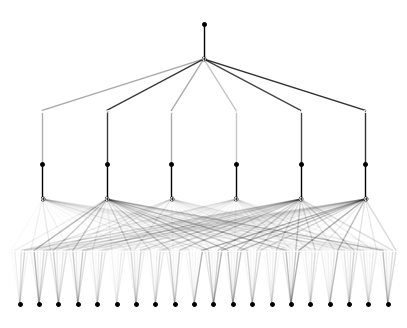

In [22]:
model.plot()

saving model version 0.2


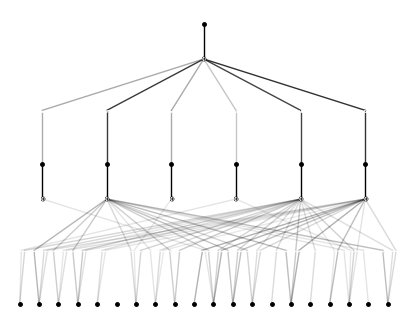

In [23]:
model = model.prune()
model.plot()

In [24]:
results = model.fit(dataset, opt="LBFGS", steps=5, metrics=(train_acc, test_acc));
print(results['train_acc'][-1], results['test_acc'][-1])

| train_loss: 2.22e-01 | test_loss: 2.87e-01 | reg: 0.00e+00 | :  20%|▏| 1/5 [00:00<00:02,  1.40it/s

ACC: 0.9027, AUC: 0.9658, SP: 0.8846, MCC: 0.8057, SN: 0.9259
ACC: 0.9495, AUC(test): 0.9887, SP: 0.9248, MCC: 0.8996, SN: 0.9723


| train_loss: 1.83e-01 | test_loss: 3.11e-01 | reg: 0.00e+00 | :  40%|▍| 2/5 [00:01<00:02,  1.28it/s

ACC: 0.8973, AUC: 0.9455, SP: 0.8846, MCC: 0.7940, SN: 0.9136
ACC: 0.9676, AUC(test): 0.9951, SP: 0.9586, MCC: 0.9351, SN: 0.9758


| train_loss: 1.60e-01 | test_loss: 3.17e-01 | reg: 0.00e+00 | :  60%|▌| 3/5 [00:02<00:01,  1.26it/s

ACC: 0.8973, AUC: 0.9353, SP: 0.9038, MCC: 0.7917, SN: 0.8889
ACC: 0.9838, AUC(test): 0.9985, SP: 0.9850, MCC: 0.9675, SN: 0.9827


| train_loss: 1.46e-01 | test_loss: 3.35e-01 | reg: 0.00e+00 | :  80%|▊| 4/5 [00:03<00:00,  1.17it/s

ACC: 0.8865, AUC: 0.9222, SP: 0.8942, MCC: 0.7698, SN: 0.8765
ACC: 0.9910, AUC(test): 0.9991, SP: 0.9962, MCC: 0.9820, SN: 0.9862


| train_loss: 1.35e-01 | test_loss: 3.56e-01 | reg: 9.92e+00 | : 100%|█| 5/5 [00:07<00:00,  1.46s/it

ACC: 0.8703, AUC: 0.9156, SP: 0.8846, MCC: 0.7365, SN: 0.8519
ACC: 0.9910, AUC(test): 0.9997, SP: 0.9962, MCC: 0.9820, SN: 0.9862
saving model version 0.3
0.8648648858070374 0.9909909963607788


In [ ]:
model = model.refine(10)
model.plot()

In [ ]:
results = model.fit(dataset, opt="LBFGS", steps=5, metrics=(train_acc, test_acc));
print(results['train_acc'][-1], results['test_acc'][-1])

In [ ]:
model.plot()

In [ ]:
mode = "auto"  # "manual"
"""
假设在一个神经网络模型中，坐标 (0,36,4) 可能表示：

层索引 (0): 第一层或第一个处理阶段。
单元索引 (36): 第一层中的第 37 个单元（因为索引从 0 开始）。
通道或特征索引 (4): 第 5 个通道或特征
"""

if mode == "manual":
    # manual mode
    model.fix_symbolic(0, 0, 0, 'sin');
    model.fix_symbolic(0, 1, 0, 'x^2');
    model.fix_symbolic(1, 0, 0, 'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x', 'x^2', 'x^3', 'x^4', 'exp', 'log', 'sqrt', 'tanh', 'sin', 'abs']
    model.auto_symbolic(lib=lib)
    
    

In [ ]:
from kan.utils import ex_round

ex_round(model.symbolic_formula()[0][0], 4)